In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pygris import block_groups
import os
from typing import cast

from epymorph.data_shape import Shapes


In [ ]:
from geo_builder import census_df

census_df.head()

In [2]:
STATE = "AZ"
COUNTY = "Maricopa"
YEAR = 2019
census_block_groups = block_groups(state=STATE, county=COUNTY, year=YEAR, cache=False)
census_block_groups = gpd.GeoDataFrame(census_block_groups, geometry="geometry")
census_block_groups = census_block_groups.to_crs("EPSG:4326")

census_block_groups["area"] = census_block_groups["geometry"].area

Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_48728/3946758822.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  census_block_groups["area"] = census_block_groups["geometry"].area


In [76]:
census_block_groups = census_df.merge(
    census_block_groups, left_on="label", right_on="GEOID", how="inner"
)
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.49136471795472, 33.71546544071483]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC FUNCSTAT  \
0     010101        1  040130101011  Block Group 1  G5030        S   
1     010101        2  040130101012  Block Group 2  G5030        S   
2     010101        3  040130101013  Block Group 3  G5030        S   
3     010102        1  040130101021  Block Group 1  G5030        S   
4     010102        2  040130101022  Block Group 2  G5030        S   
...      ...      ...           ...            ...    ...      ...   
2500  980100        1  040139801001  Block Group 1  G5030        S   
2501  980400        1  040139804001  Block Group 1  G5030        S   
2502  980500        1  040139805001  Block Group 1  G5030        S   
2503  980600        1  040139806001  Block Group 1  G5030        S   
2504  980700        1  040139807001  Block Group 1  G5030        S   

           ALAND    AWATER     INTPTLAT      INTPTLON  \
0       18032622      3588  +33.7694934  -111.7709334   
1       29178977      9045  +33.7405709  -111.7196069   
2        6873642     14833  +33.7230978  -111.6664268   
3     2368942711  32074893  +33.7127644  -111.4789010   
4       11856136       825  +33.8245981  -111.8513946   
...          ...       ...          ...           ...   
2500  2912703561      6913  +32.7253646  -112.9041112   
2501     3915493         0  +33.2980736  -111.9587909   
2502     3584288         0  +33.2439248  -111.8863309   
2503     9912508      5852  +33.3411156  -111.6172549   
2504    85318128     29985  +33.6921146  -111.7598427   

                                               geometry      area  
0     POLYGON ((-111.78699 33.79047, -111.78698 33.7...  0.001755  
1     POLYGON ((-111.78691 33.73801, -111.78692 33.7...  0.002840  
2     POLYGON ((-111.68352 33.72266, -111.68352 33.7...  0.000670  
3     POLYGON ((-111.88205 34.00478, -111.88203 34.0...  0.233538  
4     POLYGON ((-111.89139 33.81618, -111.89138 33.8...  0.001155  
...                                                 ...       ...  
2500  POLYGON ((-113.33389 32.50558, -113.33387 32.5...  0.280007  
2501  POLYGON ((-111.97203 33.30526, -111.97185 33.3...  0.000379  
2502  POLYGON ((-111.89328 33.26139, -111.89323 3

In [6]:
shapefile_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/NASA/gpw-v4-admin-unit-center-points-population-estimates-rev11_usaaz_shp/gpw_v4_admin_unit_center_points_population_estimates_rev11_usaaz.shp"
nasa_asc_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/NASA/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-rev11_2020_30_sec_asc/gpw_v4_population_count_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_sec_1.asc"
dir_path = os.path.expanduser("~/Desktop/Github/EpyMoRPH_graphs/NASA")


# NASA gridded population


In [8]:
import rasterio

nasa_asc_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/NASA/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-rev11_2020_30_sec_asc/gpw_v4_population_count_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_sec_1.asc"
with rasterio.open(nasa_asc_path) as src:
    data = src.read(1)
    meta = src.meta

print("Data shape:", data.shape)
print("Metadata:", meta)
import matplotlib.pyplot as plt

# Plotting the raster data
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(data, cmap="binary")  # You can change the colormap to suit your data better
plt.colorbar(label="Population count")  # Adjust the label according to your data
plt.title("NASA Population Count 2020")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("off")
plt.show()

Data shape: (10800, 10800)
Metadata: {'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999.0, 'width': 10800, 'height': 10800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333333339, 0.0, -180.0,
       0.0, -0.0083333333333339, 90.00000000001191)}


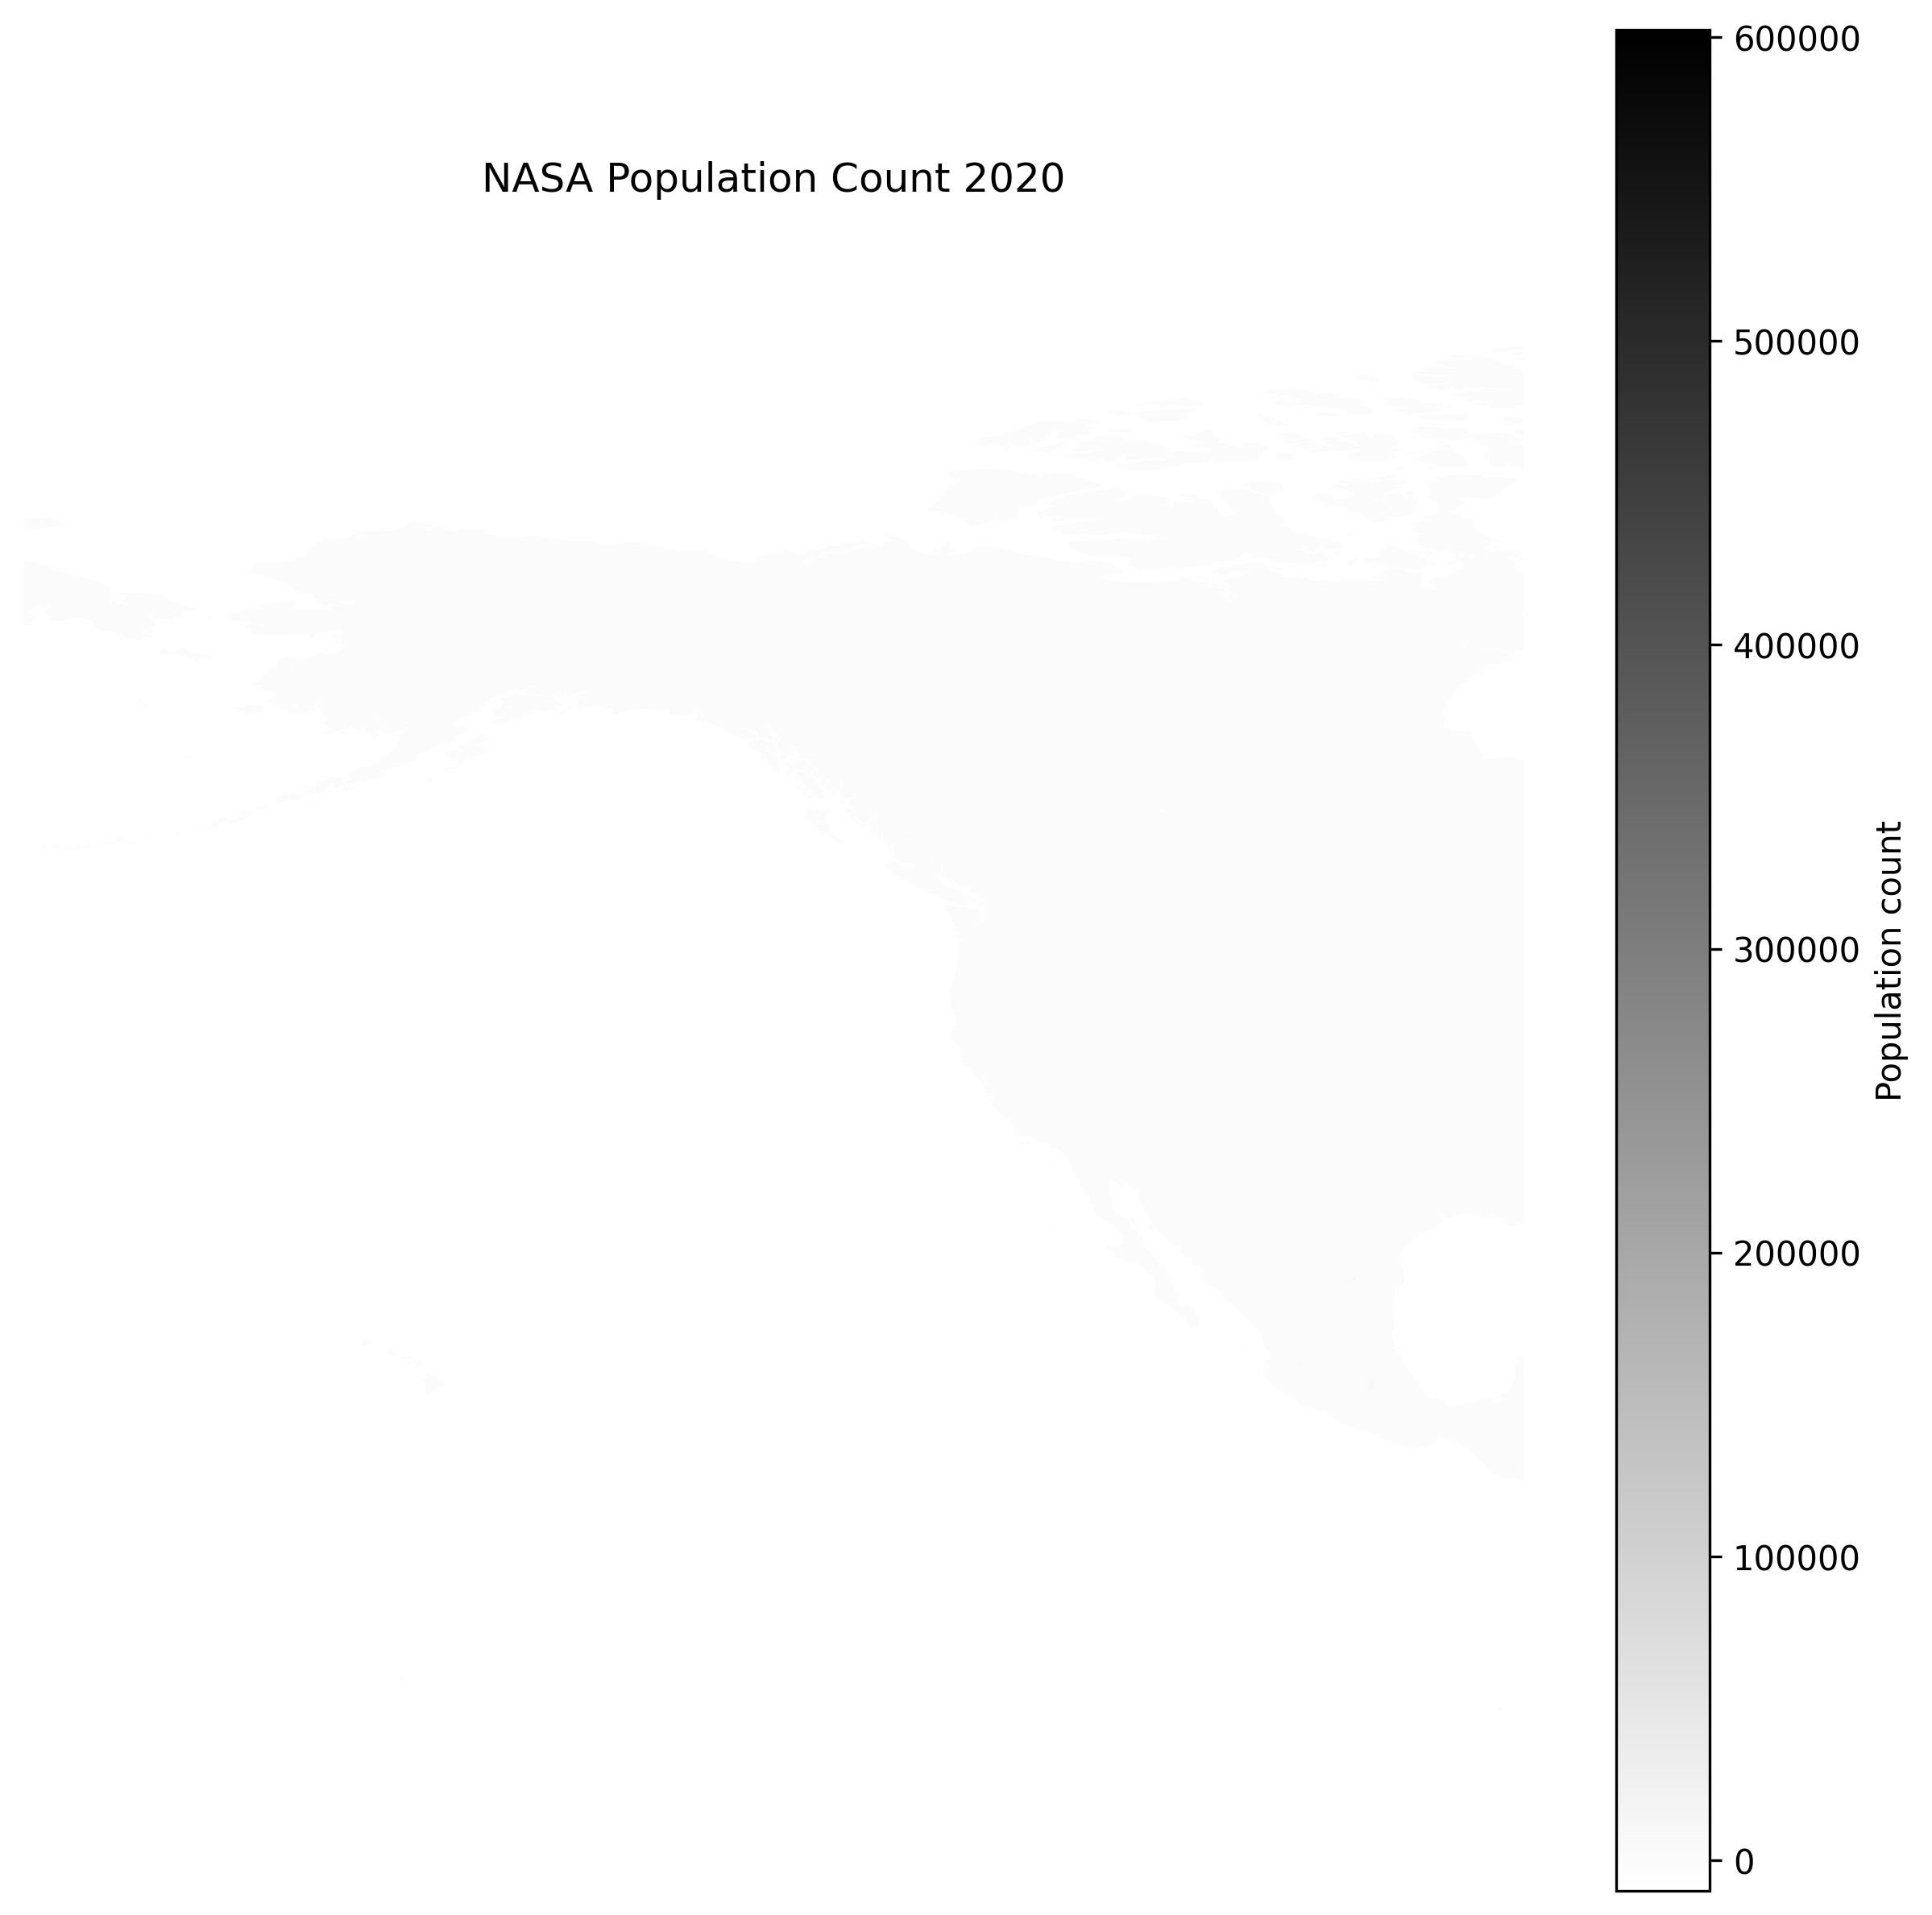

In [47]:
import matplotlib.pyplot as plt

# Plotting the raster data
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(data, cmap="binary")  # You can change the colormap to suit your data better
plt.colorbar(label="Population count")  # Adjust the label according to your data
plt.title("NASA Population Count 2020")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("off")
plt.show()


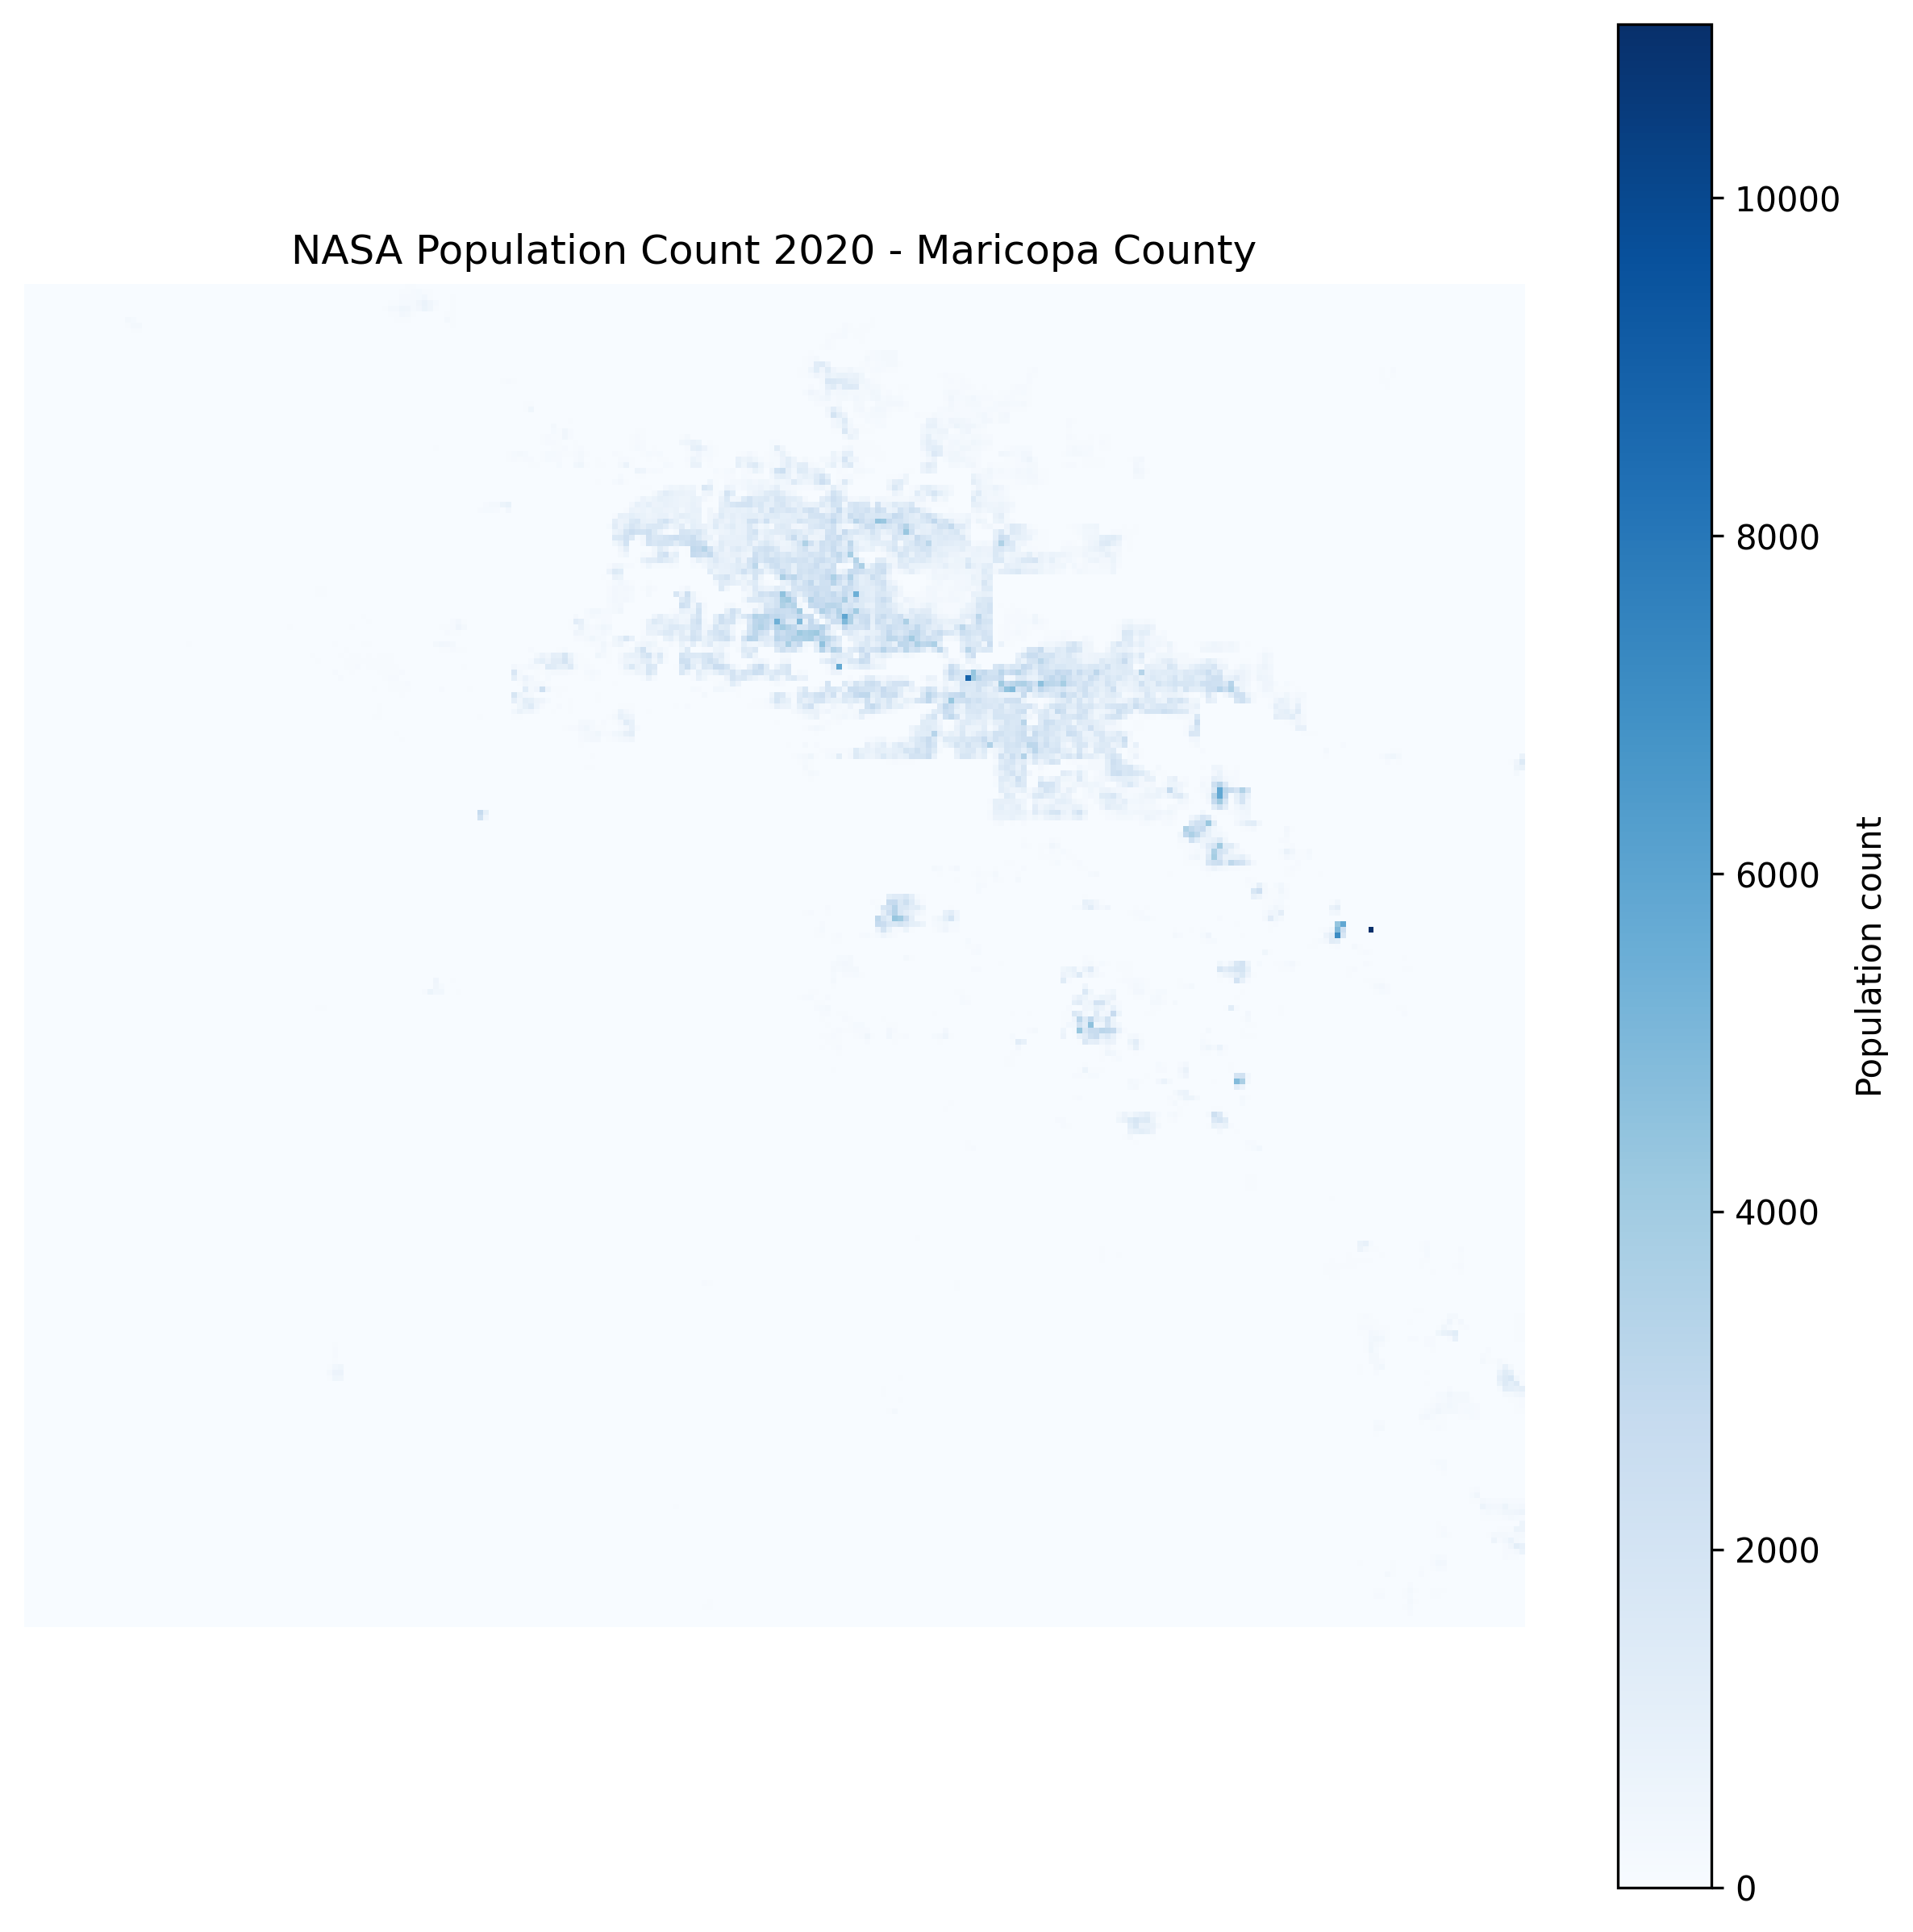

In [10]:
import rasterio
from rasterio.plot import show
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

maricopa_bounds = (-113.333, 32.004, -111.101, 34.004)

with rasterio.open(nasa_asc_path) as src:
    window = from_bounds(*maricopa_bounds, transform=src.transform)
    maricopa_data = src.read(1, window=window)

    plt.figure(figsize=(10, 10), dpi=300)

    plt.imshow(maricopa_data, cmap="Blues")  # Adjust the colormap as needed
    plt.colorbar(label="Population count")  # Customize the label based on your data
    plt.title("NASA Population Count 2020 - Maricopa County")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis("off")

    plt.show()


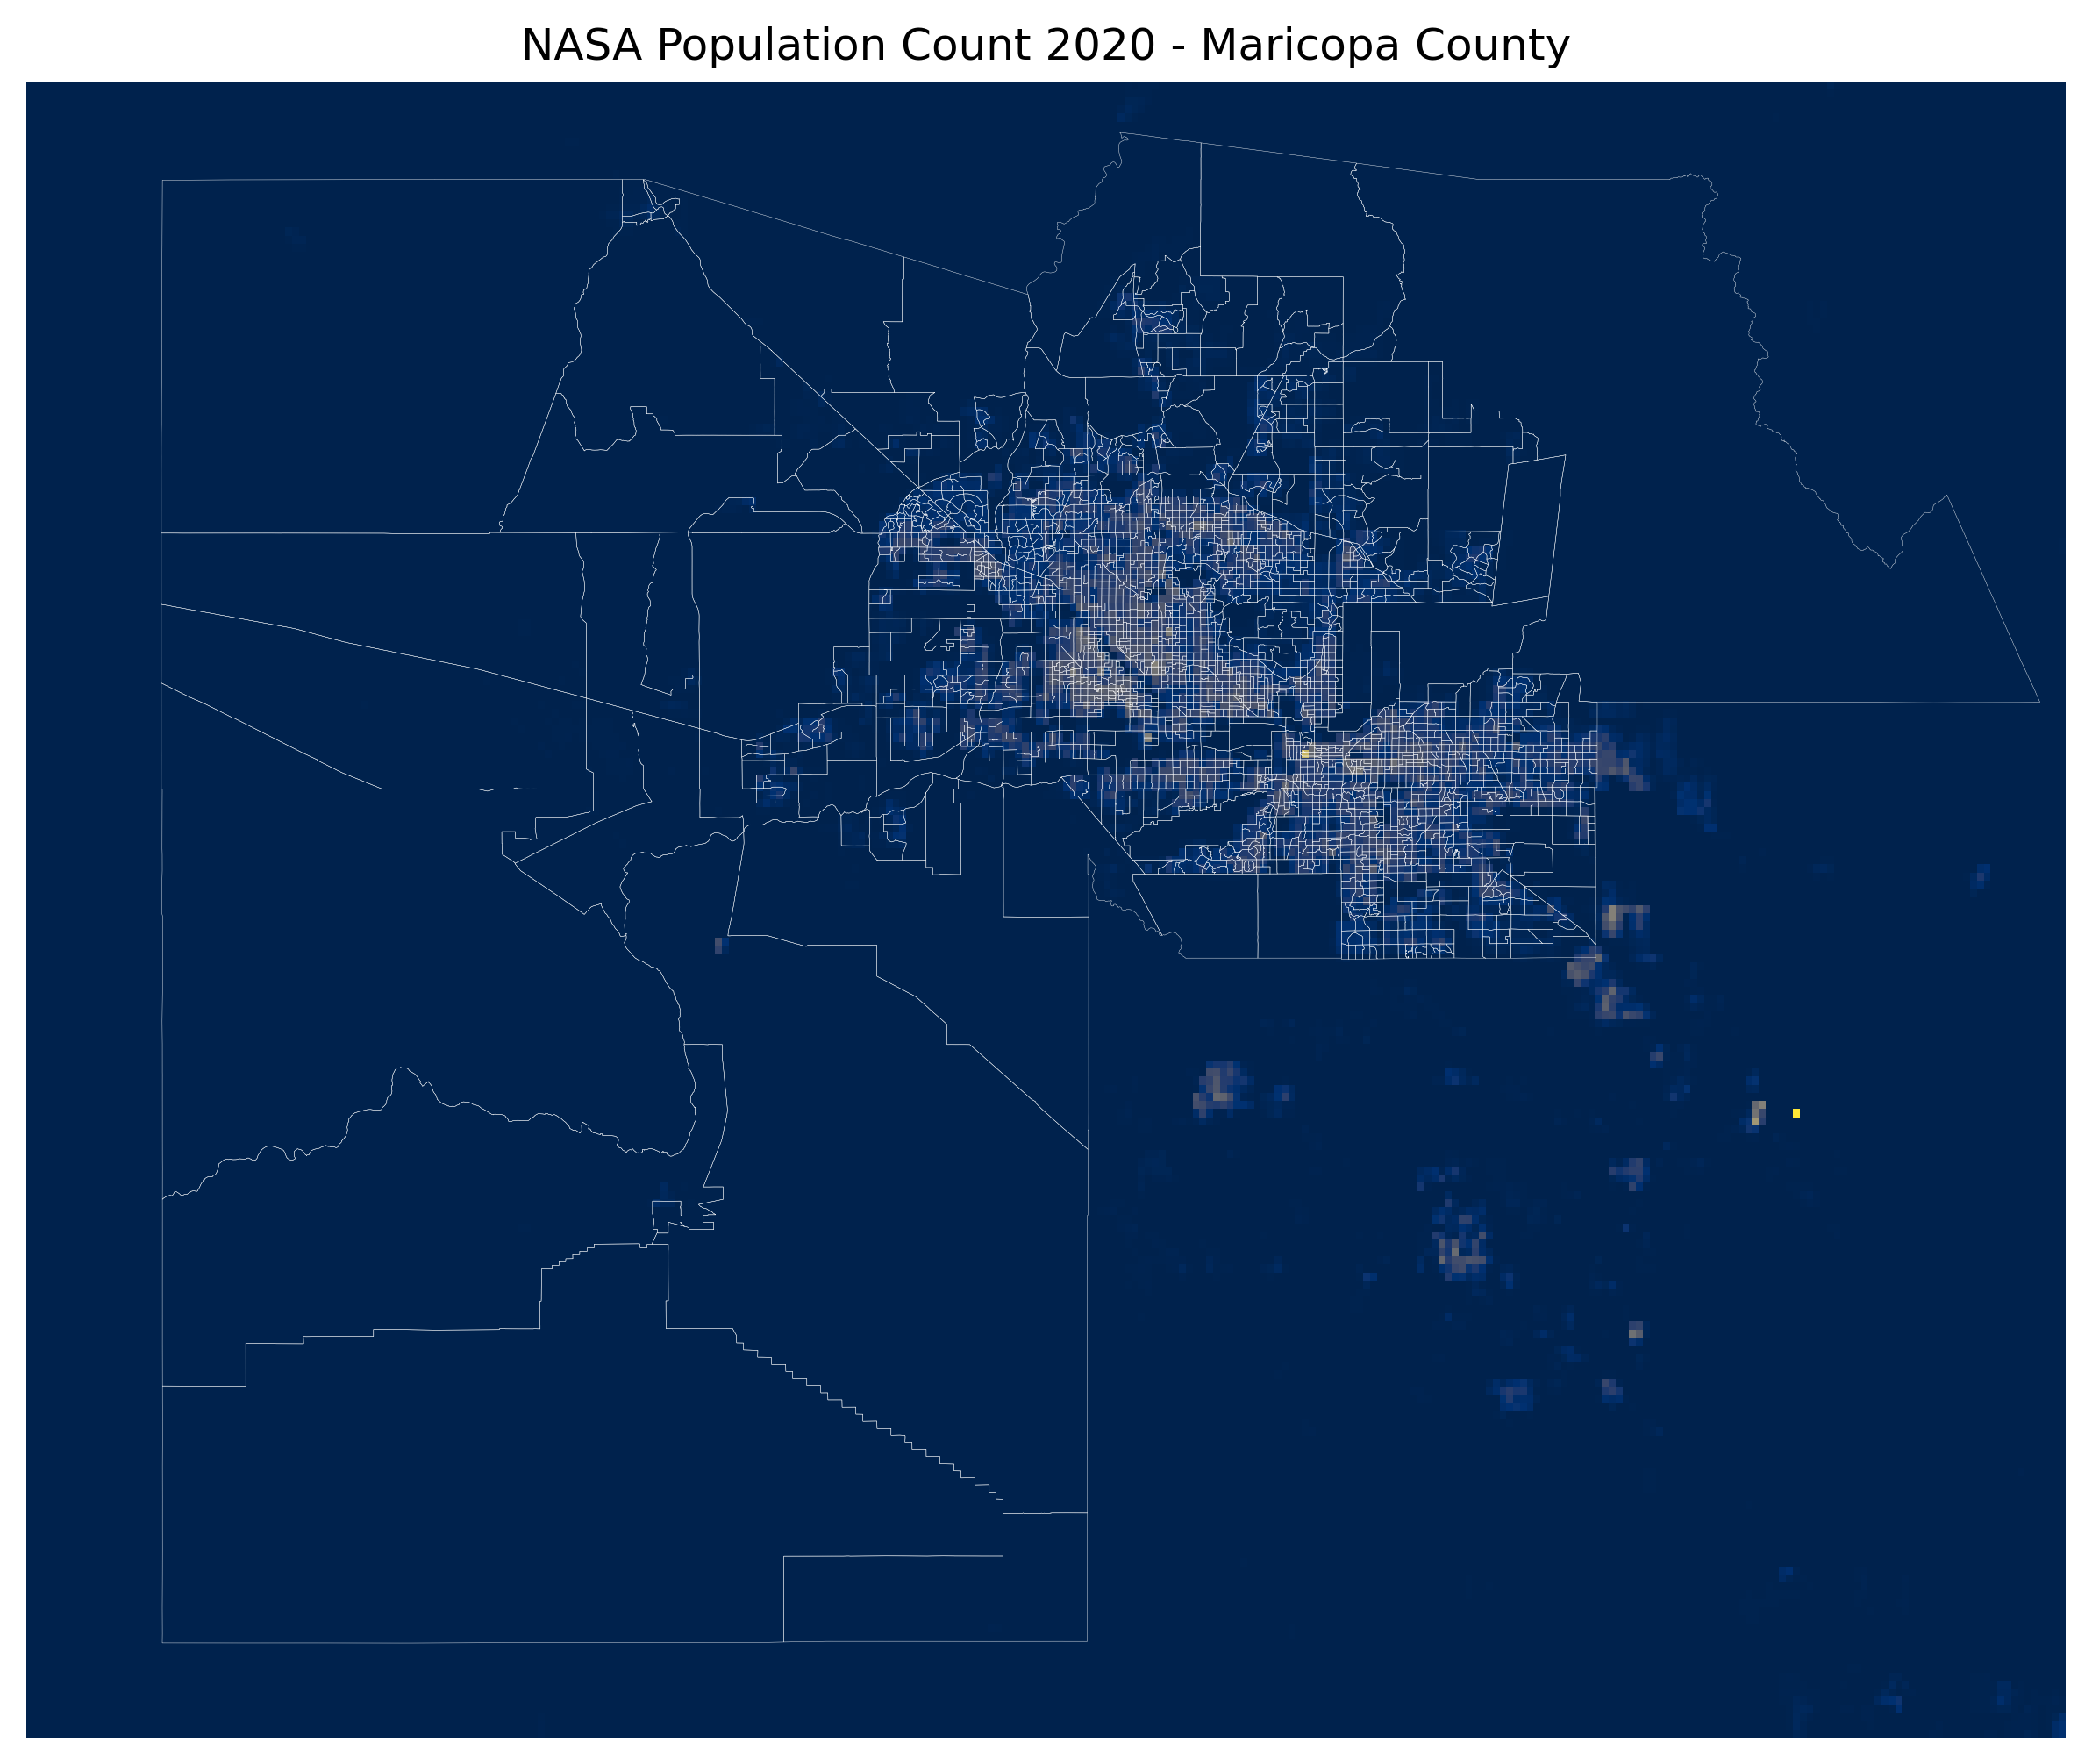

In [51]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd

save_path = os.path.join(dir_path, "NASA Population Count 2020 - Maricopa County.png")


with rasterio.open(nasa_asc_path) as src:
    window = rasterio.windows.from_bounds(*maricopa_bounds, transform=src.transform)
    maricopa_data = src.read(
        1,
        window=window,
        out_shape=(int(window.height), int(window.width)),
        resampling=rasterio.enums.Resampling.nearest,
    )
    transform = src.window_transform(window)

    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    show(maricopa_data, transform=transform, ax=ax, cmap="cividis")

census_block_groups.plot(ax=ax, edgecolor="white", color="none", linewidth=0.1)

plt.title("NASA Population Count 2020 - Maricopa County")
plt.axis("off")
plt.savefig(save_path)
plt.show()


In [ ]:
import folium
from rasterio.plot import show

with rasterio.open(nasa_asc_path) as src:
    bounds = src.bounds
    data = src.read(1)

    lon_center = (bounds.left + bounds.right) / 2
    lat_center = (bounds.bottom + bounds.top) / 2

m = folium.Map(location=[lat_center, lon_center], zoom_start=2)

m


# NASA


In [48]:
gdf = gpd.read_file(shapefile_path)

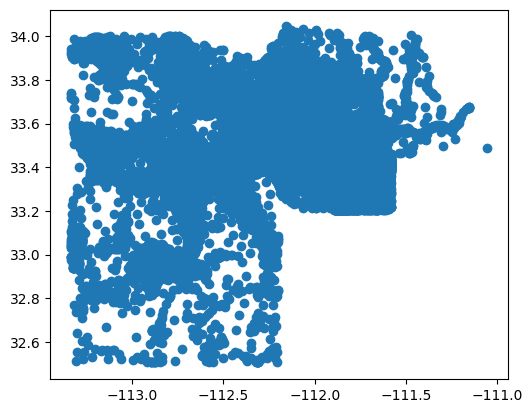

In [49]:
maricopa_county_gdf = gdf[gdf["NAME2"] == "Maricopa County"]

if not maricopa_county_gdf.empty:
    maricopa_county_gdf.plot()
    plt.show()
else:
    print("No data found for 'Maricopa County'.")

In [52]:
maricopa_county_gdf.loc[:, "school"] = maricopa_county_gdf[
    ["A00_04B", "A05_09B", "A10_14B", "A15_19B"]
].sum(axis=1)

maricopa_county_gdf.loc[:, "adults"] = maricopa_county_gdf[
    [
        "A20_24B",
        "A25_29B",
        "A30_34B",
        "A35_39B",
        "A40_44B",
        "A45_49B",
        "A50_54B",
        "A55_59B",
        "A60_64B",
    ]
].sum(axis=1)

maricopa_county_gdf.loc[:, "elder"] = maricopa_county_gdf["A65PLUSB"]

maricopa_county_gdf.loc[:, "Population"] = maricopa_county_gdf[
    [
        "A00_04B",
        "A05_09B",
        "A10_14B",
        "A15_19B",
        "A20_24B",
        "A25_29B",
        "A30_34B",
        "A35_39B",
        "A40_44B",
        "A45_49B",
        "A50_54B",
        "A55_59B",
        "A60_64B",
        "A65PLUSB",
    ]
].sum(axis=1)

maricopa_county_gdf.loc[:, "Population 2015"] = maricopa_county_gdf["UN_2020_E"]

maricopa_county_gdf[["school", "adults", "elder", "Population", "Population 2015"]]

/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py

school  adults  elder  Population  Population 2015
68707      7.0    11.0    1.0        19.0               23
68708     30.0    43.0    3.0        76.0               92
68709     24.0    39.0    0.0        63.0               76
68710     12.0    37.0    2.0        51.0               62
68711     25.0    21.0    2.0        48.0               58
...        ...     ...    ...         ...              ...
141431    19.0    41.0    7.0        67.0               81
141432    21.0    46.0    6.0        73.0               88
141433    17.0    36.0   10.0        63.0               76
141434    25.0    33.0    6.0        64.0               77
141435    41.0    60.0    4.0       105.0              127

[72729 rows x 5 columns]

In [53]:
maricopa_county_gdf_filtered = maricopa_county_gdf[
    maricopa_county_gdf["Population 2015"] != 0
]
maricopa_county_gdf_filtered

GUBID ISOALPHA  \
68707   {A595A3F9-951B-4E5B-A345-A24DADEB589B}      USA   
68708   {E39F9C25-54F2-4C41-AAAB-12EEE1AB8241}      USA   
68709   {FE6E4099-31DD-4C54-80E8-F88F455292E5}      USA   
68710   {E583D4AE-83FB-4AAD-AB19-BE135FBFB738}      USA   
68711   {06767313-659D-435C-896B-A2FEE28C5421}      USA   
...                                        ...      ...   
141431  {167A9F79-144F-4B67-B76B-7477A9A0649F}      USA   
141432  {CCB5A50A-0579-47C6-99B8-AF33B0AB3F71}      USA   
141433  {EC024ABD-E10D-4BF8-BB94-93E357D838AF}      USA   
141434  {8C9352BB-0D19-4006-94C6-36D182BB26A0}      USA   
141435  {94A3959B-D98B-47B9-A999-8954D39492E8}      USA   

                       COUNTRYNM    NAME1            NAME2  \
68707   United States of America  Arizona  Maricopa County   
68708   United States of America  Arizona  Maricopa County   
68709   United States of America  Arizona  Maricopa County   
68710   United States of America  Arizona  Maricopa County   
68711   United States of America  Arizona  Maricopa County   
...                          ...      ...              ...   
141431  United States of America  Arizona  Maricopa County   
141432  United States of America  Arizona  Maricopa County   
141433  United States of America  Arizona  Maricopa County   
141434  United States of America  Arizona  Maricopa County   
141435  United States of America  Arizona  Maricopa County   

                       NAME3          NAME4       NAME5 NAME6  CENTROID_X  \
68707      Census Tract 6106  Block Group 3  Block 3004    NA -112.124130   
68708      Census Tract 6100  Block Group 4  Block 4012    NA -112.159029   
68709      Census Tract 6100  Block Group 4  Block 4029    NA -112.157291   
68710      Census Tract 6100  Block Group 4  Block 4004    NA -112.157097   
68711      Census Tract 6100  Block Group 4  Block 4008    NA -112.154604   
...                      ...            ...         ...   ...         ...   
141431  Census Tract 4224.02  Block Group 3  Block 3016    NA -111.783745   
141432  Census Tract 4224.02  Block Group 3  Block 3022    NA -111.785462   
141433  Census Tract 4224.02  Block Group 3  Block 3009    NA -111.782991   
141434  Census Tract 4224.02  Block Group 3  Block 3011    NA -111.787485   
141435  Census Tract 4224.02  Block Group 3  Block 3005    NA -111.787505   

        ...  A75_79M  A80PLUSM  A80_84M  A85PLUSM  \
68707   ...      0.0       0.0      0.0       0.0   
68708   ...      0.0       0.0      0.0       0.0   
68709   ...      0.0       0.0      0.0       0.0   
68710   ...      0.0       0.0      0.0       0.0   
68711   ...      1.0       0.0      0.0       0.0   
...     ...      ...       ...      ...       ...   
141431  ...      0.0       0.0      0.0       0.0   
141432  ...      2.0       0.0      0.0       0.0   
141433  ...      1.0       0.0      0.0       0.0   
141434  ...      0.0       0.0      0.0       0.0   
141435  ...      0.0       1.0      0.0       1.0   

                           geometry school  adults  elder  Population  \
68707   POINT (-112.12413 33.80274)    7.0    11.0    1.0        19.0   
68708   POINT (-112.15903 33.86704)   30.0    43.0    3.0        76.0   
68709   POINT (-112.15729 33.86669)   24.0    39.0    0.0        63.0   
68710   POINT (-112.15710 33.87047)   12.0    37.0    2.0        51.0   
68711   POINT (-112.15460 33.86498)   25.0    21.0    2.0        48.0   
...                             ...    ...     ...    ...         ...   
141431  POINT (-111.78375 33.35179)   19.0    41.0    7.0        67.0   
141432  POINT (-111.78546 33.35242)   21.0    46.0    6.0        73.0   
141433  POINT (-111.78299 33.35320)   17.0    36.0   10.0        63.0   
141434  POINT (-111.78748 33.35319)   25.0    33.0    6.0        64.0   
141435  POINT (-111.78750 33.35428)   41.0    60.0    4.0       105.0   

        Population 2015  
68707                23  
68708                92  
68709                76  
68710                62  
68711             

In [82]:
census_block_groups = gpd.GeoDataFrame(census_block_groups, geometry="geometry")
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.49136471795472, 33.71546544071483]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC FUNCSTAT  \
0     010101        1  040130101011  Block Group 1  G5030        S   
1     010101        2  040130101012  Block Group 2  G5030        S   
2     010101        3  040130101013  Block Group 3  G5030        S   
3     010102        1  040130101021  Block Group 1  G5030        S   
4     010102        2  040130101022  Block Group 2  G5030        S   
...      ...      ...           ...            ...    ...      ...   
2500  980100        1  040139801001  Block Group 1  G5030        S   
2501  980400        1  040139804001  Block Group 1  G5030        S   
2502  980500        1  040139805001  Block Group 1  G5030        S   
2503  980600        1  040139806001  Block Group 1  G5030        S   
2504  980700        1  040139807001  Block Group 1  G5030        S   

           ALAND    AWATER     INTPTLAT      INTPTLON  \
0       18032622      3588  +33.7694934  -111.7709334   
1       29178977      9045  +33.7405709  -111.7196069   
2        6873642     14833  +33.7230978  -111.6664268   
3     2368942711  32074893  +33.7127644  -111.4789010   
4       11856136       825  +33.8245981  -111.8513946   
...          ...       ...          ...           ...   
2500  2912703561      6913  +32.7253646  -112.9041112   
2501     3915493         0  +33.2980736  -111.9587909   
2502     3584288         0  +33.2439248  -111.8863309   
2503     9912508      5852  +33.3411156  -111.6172549   
2504    85318128     29985  +33.6921146  -111.7598427   

                                               geometry      area  
0     POLYGON ((-111.78699 33.79047, -111.78698 33.7...  0.001755  
1     POLYGON ((-111.78691 33.73801, -111.78692 33.7...  0.002840  
2     POLYGON ((-111.68352 33.72266, -111.68352 33.7...  0.000670  
3     POLYGON ((-111.88205 34.00478, -111.88203 34.0...  0.233538  
4     POLYGON ((-111.89139 33.81618, -111.89138 33.8...  0.001155  
...                                                 ...       ...  
2500  POLYGON ((-113.33389 32.50558, -113.33387 32.5...  0.280007  
2501  POLYGON ((-111.97203 33.30526, -111.97185 33.3...  0.000379  
2502  POLYGON ((-111.89328 33.26139, -111.89323 3

In [83]:
import geopandas as gpd
import numpy as np

joined_gdf = gpd.sjoin(
    maricopa_county_gdf, census_block_groups, how="inner", op="within"
)

aggregated_data = joined_gdf.groupby("index_right").agg(
    {
        "Population 2015": lambda x: list(x),  # Aggregate populations into lists
        "geometry": lambda x: list(x),  # Aggregate geometries into lists
    }
)

aggregated_data["Population"] = aggregated_data["Population 2015"].apply(np.array)
aggregated_data["geometry"] = aggregated_data["geometry"].apply(np.array)

census_block_groups["Point_Geometries"] = None
census_block_groups["Populations"] = None

for idx in aggregated_data.index:
    census_block_groups.at[idx, "Point_Geometries"] = aggregated_data.at[
        idx, "geometry"
    ]
    census_block_groups.at[idx, "Populations"] = aggregated_data.at[idx, "Population"]


/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [84]:
from shapely.geometry import Point  # Ensure you have this import if you're using Point


def calculate_weighted_social_centroid(df):
    df["Social_centroid"] = None  # Initialize the column for social centroids

    for idx, row in df.iterrows():
        # Explicitly check if 'Point_Geometries' and 'Populations' are not None or empty by comparing their lengths to zero
        if (
            row["area"] > 0.02
            and row.get("Point_Geometries") is not None
            and len(row["Point_Geometries"]) > 0
            and row.get("Populations") is not None
            and len(row["Populations"]) > 0
        ):
            # Ensure 'Point_Geometries' and 'Populations' lists have the same length
            if len(row["Point_Geometries"]) == len(row["Populations"]):
                # Calculate weighted latitudes and longitudes
                weighted_latitudes = [
                    point.y * population
                    for point, population in zip(
                        row["Point_Geometries"], row["Populations"]
                    )
                ]
                weighted_longitudes = [
                    point.x * population
                    for point, population in zip(
                        row["Point_Geometries"], row["Populations"]
                    )
                ]
                # Calculate total population
                total_population = sum(row["Populations"])

                # Proceed if total population is greater than 0
                if total_population > 0:
                    mean_lat = sum(weighted_latitudes) / total_population
                    mean_lon = sum(weighted_longitudes) / total_population
                    # Assign the calculated Point as the social centroid
                    df.at[idx, "Social_centroid"] = Point(mean_lon, mean_lat)

    return df


In [85]:
census_block_groups = calculate_weighted_social_centroid(census_block_groups)
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.49136471795472, 33.71546544071483]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE  ... FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0     010101        1  ...        S    18032622      3588  +33.7694934   
1     010101        2  ...        S    29178977      9045  +33.7405709   
2     010101        3  ...        S     6873642     14833  +33.7230978   
3     010102        1  ...        S  2368942711  32074893  +33.7127644   
4     010102        2  ...        S    11856136       825  +33.8245981   
...      ...      ...  ...      ...         ...       ...          ...   
2500  980100        1  ...        S  2912703561      6913  +32.7253646   
2501  980400        1  ...        S     3915493         0  +33.2980736   
2502  980500        1  ...        S     3584288         0  +33.2439248   
2503  980600        1  ...        S     9912508      5852  +33.3411156   
2504  980700        1  ...        S    85318128     29985  +33.6921146   

          INTPTLON                                           geometry  \
0     -111.7709334  POLYGON ((-111.78699 33.79047, -111.78698 33.7...   
1     -111.7196069  POLYGON ((-111.78691 33.73801, -111.78692 33.7...   
2     -111.6664268  POLYGON ((-111.68352 33.72266, -111.68352 33.7...   
3     -111.4789010  POLYGON ((-111.88205 34.00478, -111.88203 34.0...   
4     -111.8513946  POLYGON ((-111.89139 33.81618, -111.89138 33.8...   
...            ...                                                ...   
2500  -112.9041112  POLYGON ((-113.33389 32.50558, -113.33387 32.5...   
2501  -111.9587909  POLYGON ((-111.97203 33.30526, -111.97185 33.3...   
2502  -111.8863309  POLYGON ((-111.89328 33.26139, -111.89323 33.2...   
2503  -111.6172549  POLYGON ((-111.63577 33.34689, -111.63576 33.3...   
2504  -111.7598427  POLYGON ((-111.78744 33.68358, -111.78719 33.6...   

          area                                   Point_Geometries  \
0     0.001755  [POINT (-111.77445325999997 33.79407231600004)...   
1     0.002840  [POINT (-111.72833864299997 33.73074189600004)...   
2     0.000670  [POINT (-111.67266723999995 33.718333449000056...   
3     0.233538  [POINT (-111.52616249699997 33.64038410400008)...   
4     0.001155  [POINT (-111.87216181899998 33.81529087900003)...   
...    

In [ ]:
census_block_groups["Populations"][0].sum()

In [58]:
import numpy as np
import pandas as pd
import re

In [73]:
census_block_groups

label                                 centroid_x  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.49136471795472, 33.71546544071483]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE  ...    AWATER     INTPTLAT      INTPTLON  \
0     010101        1  ...      3588  +33.7694934  -111.7709334   
1     010101        2  ...      9045  +33.7405709  -111.7196069   
2     010101        3  ...     14833  +33.7230978  -111.6664268   
3     010102        1  ...  32074893  +33.7127644  -111.4789010   
4     010102        2  ...       825  +33.8245981  -111.8513946   
...      ...      ...  ...       ...          ...           ...   
2500  980100        1  ...      6913  +32.7253646  -112.9041112   
2501  980400        1  ...         0  +33.2980736  -111.9587909   
2502  980500        1  ...         0  +33.2439248  -111.8863309   
2503  980600        1  ...      5852  +33.3411156  -111.6172549   
2504  980700        1  ...     29985  +33.6921146  -111.7598427   

                                               geometry      area  \
0     POLYGON ((-111.78699 33.79047, -111.78698 33.7...  0.001755   
1     POLYGON ((-111.78691 33.73801, -111.78692 33.7...  0.002840   
2     POLYGON ((-111.68352 33.72266, -111.68352 33.7...  0.000670   
3     POLYGON ((-111.88205 34.00478, -111.88203 34.0...  0.233538   
4     POLYGON ((-111.89139 33.81618, -111.89138 33.8...  0.001155   
...                                                 ...       ...   
2500  POLYGON ((-113.33389 32.50558, -113.33387 32.5...  0.280007   
2501  POLYGON ((-111.97203 33.30526, -111.97185 33.3...  0.000379   
2502  POLYGON ((-111.89328 33.26139, -111.89323 33.2...  0.000347   
2503  POLYGON ((-111.63577 33.34689, -111.63576 33.3...  0.000961   
2504  POLYGON ((-111.78744 33.68358, -111.78719 33.6...  0.008299   

                                       Point_Geometries  \
0     [POINT (-111.77445325999997 33.79407231600004)...   
1     [POINT (-111.72833864299997 33.73074189600004)...   
2     [POINT (-111.67266723999995 33.718333449000056...   
3     [POINT (-111.52616249699997 33.64038410400008)...   
4     [POINT (-111.87216181899998 33.81529087900003)...   
...                                                 ...   
2500  [POINT (-112.85353275699998 32.65967790000008)...   
2501  [POINT (-111.96542825999995 33.29260494600004)...   
2502  [POINT (-111.889

In [78]:
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.49136471795472, 33.71546544071483]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC FUNCSTAT  \
0     010101        1  040130101011  Block Group 1  G5030        S   
1     010101        2  040130101012  Block Group 2  G5030        S   
2     010101        3  040130101013  Block Group 3  G5030        S   
3     010102        1  040130101021  Block Group 1  G5030        S   
4     010102        2  040130101022  Block Group 2  G5030        S   
...      ...      ...           ...            ...    ...      ...   
2500  980100        1  040139801001  Block Group 1  G5030        S   
2501  980400        1  040139804001  Block Group 1  G5030        S   
2502  980500        1  040139805001  Block Group 1  G5030        S   
2503  980600        1  040139806001  Block Group 1  G5030        S   
2504  980700        1  040139807001  Block Group 1  G5030        S   

           ALAND    AWATER     INTPTLAT      INTPTLON  \
0       18032622      3588  +33.7694934  -111.7709334   
1       29178977      9045  +33.7405709  -111.7196069   
2        6873642     14833  +33.7230978  -111.6664268   
3     2368942711  32074893  +33.7127644  -111.4789010   
4       11856136       825  +33.8245981  -111.8513946   
...          ...       ...          ...           ...   
2500  2912703561      6913  +32.7253646  -112.9041112   
2501     3915493         0  +33.2980736  -111.9587909   
2502     3584288         0  +33.2439248  -111.8863309   
2503     9912508      5852  +33.3411156  -111.6172549   
2504    85318128     29985  +33.6921146  -111.7598427   

                                               geometry      area  
0     POLYGON ((-111.78699 33.79047, -111.78698 33.7...  0.001755  
1     POLYGON ((-111.78691 33.73801, -111.78692 33.7...  0.002840  
2     POLYGON ((-111.68352 33.72266, -111.68352 33.7...  0.000670  
3     POLYGON ((-111.88205 34.00478, -111.88203 34.0...  0.233538  
4     POLYGON ((-111.89139 33.81618, -111.89138 33.8...  0.001155  
...                                                 ...       ...  
2500  POLYGON ((-113.33389 32.50558, -113.33387 32.5...  0.280007  
2501  POLYGON ((-111.97203 33.30526, -111.97185 33.3...  0.000379  
2502  POLYGON ((-111.89328 33.26139, -111.89323 3

In [86]:
# Define the custom NumPy dtype for centroids
CentroidDType = np.dtype([("longitude", np.float64), ("latitude", np.float64)])


# Function to parse the 'POINT (longitude latitude)' strings
def parse_social_centroid(point_str):
    if point_str is not None:
        match = re.match(r"POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)", point_str)
        if match:
            return np.array(
                (float(match.group(1)), float(match.group(2))), dtype=CentroidDType
            )
    return None


# Parse 'Social_centroid' strings where they exist and store in a new column for now
census_block_groups["Parsed_Social_Centroid"] = census_block_groups[
    "Social_centroid"
].apply(parse_social_centroid)

# Update 'centroid' only where 'Parsed_Social_Centroid' is not None
for i, row in census_block_groups.iterrows():
    if row["Parsed_Social_Centroid"] is not None:
        # Directly assigning a structured numpy array to a DataFrame cell can cause issues,
        # so we'll convert it to a tuple which pandas handles more gracefully
        census_block_groups.at[i, "centroid"] = tuple(row["Parsed_Social_Centroid"])

# Clean up: Drop the temporary column
census_block_groups.drop(columns=["Parsed_Social_Centroid"], inplace=True)

# Convert 'centroid' column to a structured array with the custom dtype
# This step consolidates 'centroid' into a uniform format across the DataFrame
centroids_list = [tuple(x) for x in census_block_groups["centroid"].tolist()]
structured_centroids = np.array(centroids_list, dtype=CentroidDType)
census_block_groups["centroid"] = structured_centroids

# Display the updated DataFrame for verification
census_block_groups[["Social_centroid", "centroid"]]


TypeError: expected string or bytes-like object, got 'Point'

In [87]:
for i, row in census_block_groups.iterrows():
    # Check if 'Social_centroid' is not None or NaN by verifying it's a Point (adjust based on actual null checks needed)
    if pd.notnull(row["Social_centroid"]):
        # Extracting longitude and latitude directly from the Point geometry
        longitude, latitude = row["Social_centroid"].x, row["Social_centroid"].y
        # Update 'centroid' with a list of [longitude, latitude]
        census_block_groups.at[i, "centroid"] = [longitude, latitude]


In [ ]:
census_block_groups

In [88]:
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.66335544491761, 33.71813833077136]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE  ... FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0     010101        1  ...        S    18032622      3588  +33.7694934   
1     010101        2  ...        S    29178977      9045  +33.7405709   
2     010101        3  ...        S     6873642     14833  +33.7230978   
3     010102        1  ...        S  2368942711  32074893  +33.7127644   
4     010102        2  ...        S    11856136       825  +33.8245981   
...      ...      ...  ...      ...         ...       ...          ...   
2500  980100        1  ...        S  2912703561      6913  +32.7253646   
2501  980400        1  ...        S     3915493         0  +33.2980736   
2502  980500        1  ...        S     3584288         0  +33.2439248   
2503  980600        1  ...        S     9912508      5852  +33.3411156   
2504  980700        1  ...        S    85318128     29985  +33.6921146   

          INTPTLON                                           geometry  \
0     -111.7709334  POLYGON ((-111.78699 33.79047, -111.78698 33.7...   
1     -111.7196069  POLYGON ((-111.78691 33.73801, -111.78692 33.7...   
2     -111.6664268  POLYGON ((-111.68352 33.72266, -111.68352 33.7...   
3     -111.4789010  POLYGON ((-111.88205 34.00478, -111.88203 34.0...   
4     -111.8513946  POLYGON ((-111.89139 33.81618, -111.89138 33.8...   
...            ...                                                ...   
2500  -112.9041112  POLYGON ((-113.33389 32.50558, -113.33387 32.5...   
2501  -111.9587909  POLYGON ((-111.97203 33.30526, -111.97185 33.3...   
2502  -111.8863309  POLYGON ((-111.89328 33.26139, -111.89323 33.2...   
2503  -111.6172549  POLYGON ((-111.63577 33.34689, -111.63576 33.3...   
2504  -111.7598427  POLYGON ((-111.78744 33.68358, -111.78719 33.6...   

          area                                   Point_Geometries  \
0     0.001755  [POINT (-111.77445325999997 33.79407231600004)...   
1     0.002840  [POINT (-111.72833864299997 33.73074189600004)...   
2     0.000670  [POINT (-111.67266723999995 33.718333449000056...   
3     0.233538  [POINT (-111.52616249699997 33.64038410400008)...   
4     0.001155  [POINT (-111.87216181899998 33.81529087900003)...   
...    

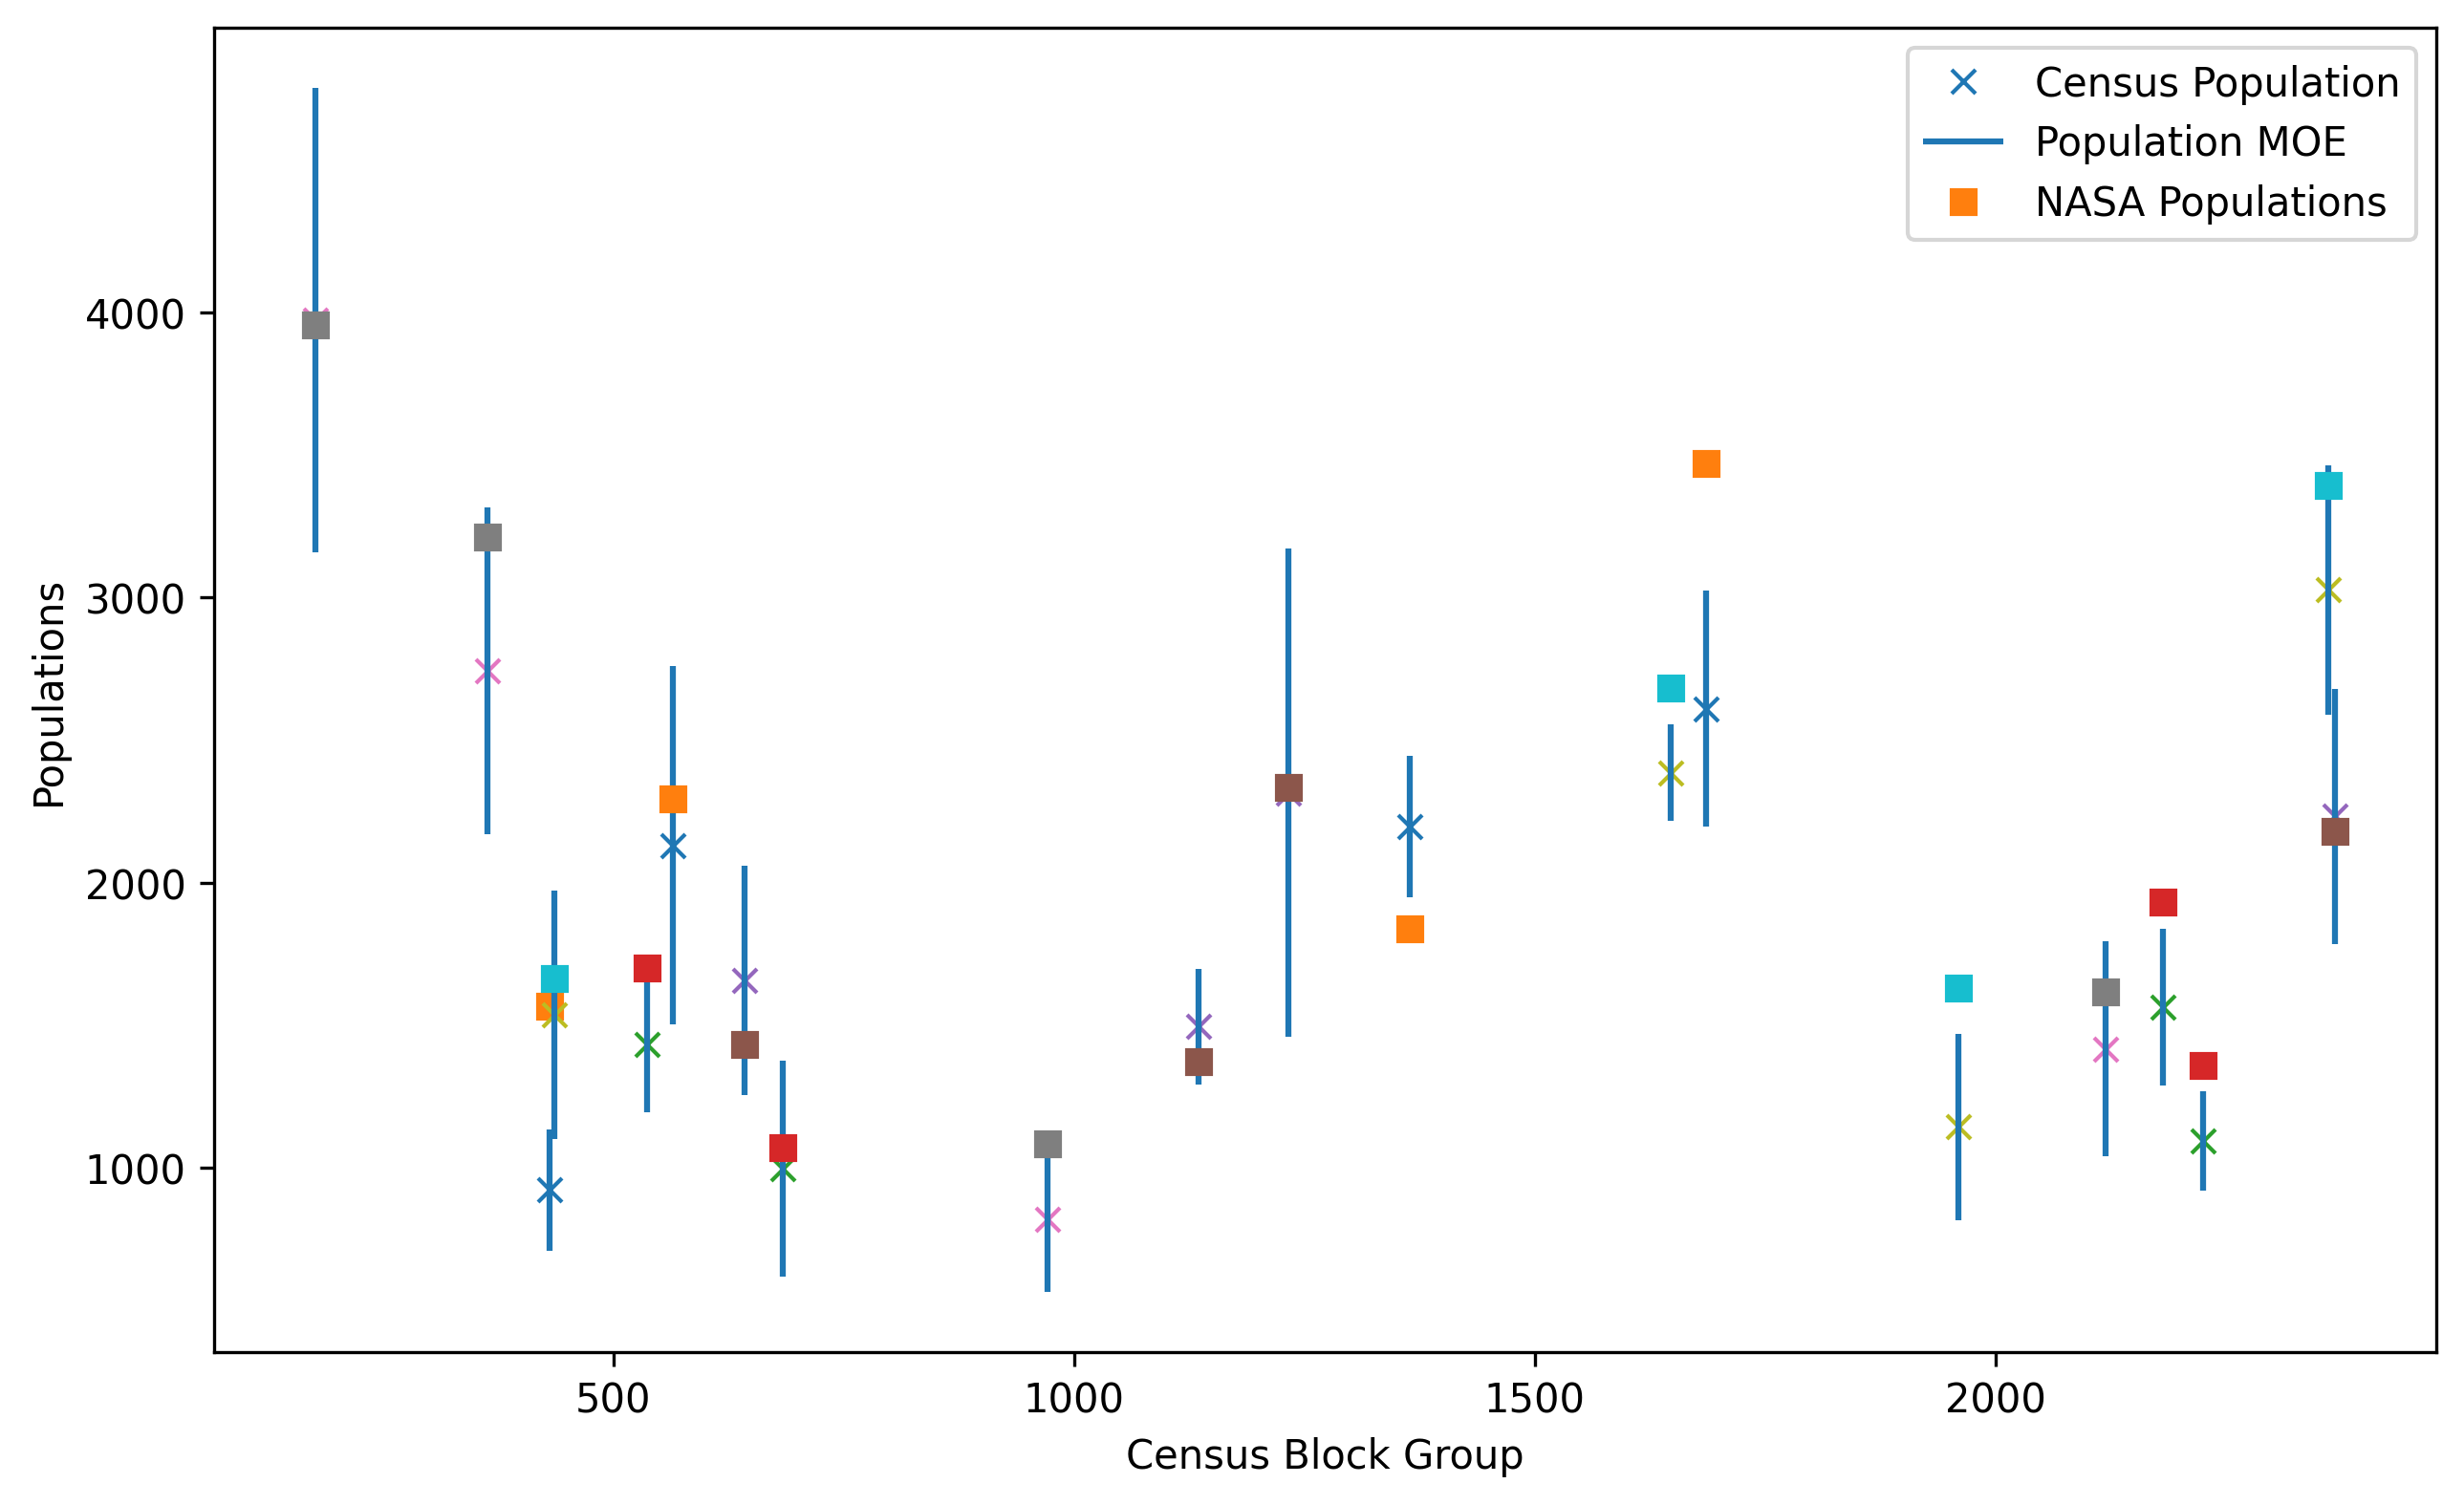

In [72]:
chosen_rows = census_block_groups.sample(20)

plt.figure(figsize=(10, 6), dpi=300)

for index, row in chosen_rows.iterrows():
    population = row["population"]
    population_MOE = row["population_MOE"]
    populations_sum = row["Populations"].sum()

    plt.plot(
        index,
        population,
        "x",
        label="Census Population" if index == chosen_rows.index[0] else "",
    )
    plt.vlines(
        index,
        population - population_MOE,
        population + population_MOE,
        label="Population MOE" if index == chosen_rows.index[0] else "",
    )
    plt.plot(
        index,
        populations_sum,
        "s",
        label="NASA Populations" if index == chosen_rows.index[0] else "",
    )

plt.legend()

plt.xlabel("Census Block Group")
plt.ylabel("Populations")
plt.show()

In [98]:
filtered_df = census_block_groups[census_block_groups["area"] > 0.02]
filtered_df["centroid"] = filtered_df.geometry.centroid

valid_centroids = census_block_groups.dropna(subset=["Social_centroid"])

social_centroids_gdf = gpd.GeoDataFrame(geometry=valid_centroids["Social_centroid"])

centroids_gdf = gpd.GeoDataFrame(geometry=filtered_df["centroid"])

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_26764/3912019737.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df['centroid'] = filtered_df.geometry.centroid
/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [94]:
census_block_groups

label                                   centroid  area km^2  \
0     040130101011   [-111.77075643330394, 33.76924660709943]         18   
1     040130101012    [-111.72000671148204, 33.7410933260103]         29   
2     040130101013   [-111.66697569766907, 33.72404113568911]          6   
3     040130101021   [-111.66335544491761, 33.71813833077136]       2368   
4     040130101022    [-111.8505100649063, 33.82609833466325]         11   
...            ...                                        ...        ...   
2500  040139801001   [-112.88186166490277, 32.66947221385736]       2912   
2501  040139804001  [-111.95879092988882, 33.298073567638134]          3   
2502  040139805001   [-111.88633119332626, 33.24392529871578]          3   
2503  040139806001   [-111.61909767565444, 33.33555256790642]          9   
2504  040139807001    [-111.73938110923666, 33.6847731208353]         85   

      population  population_MOE   population_by_school STATEFP COUNTYFP  \
0           1791           388.0     [384, 140, 0, 139]      04      013   
1           2007           472.0      [162, 106, 0, 16]      04      013   
2           1264           245.0           [0, 0, 0, 0]      04      013   
3           1139           438.0        [91, 10, 0, 48]      04      013   
4           1487           410.0      [131, 40, 28, 33]      04      013   
...          ...             ...                    ...     ...      ...   
2500           0            12.0           [0, 0, 0, 0]      04      013   
2501          13             8.0           [5, 0, 0, 0]      04      013   
2502           0            12.0           [0, 0, 0, 0]      04      013   
2503        4291           471.0  [1239, 384, 428, 175]      04      013   
2504           0            12.0           [0, 0, 0, 0]      04      013   

     TRACTCE BLKGRPCE  ... FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0     010101        1  ...        S    18032622      3588  +33.7694934   
1     010101        2  ...        S    29178977      9045  +33.7405709   
2     010101        3  ...        S     6873642     14833  +33.7230978   
3     010102        1  ...        S  2368942711  32074893  +33.7127644   
4     010102        2  ...        S    11856136       825  +33.8245981   
...      ...      ...  ...      ...         ...       ...          ...   
2500  980100        1  ...        S  2912703561      6913  +32.7253646   
2501  980400        1  ...        S     3915493         0  +33.2980736   
2502  980500        1  ...        S     3584288         0  +33.2439248   
2503  980600        1  ...        S     9912508      5852  +33.3411156   
2504  980700        1  ...        S    85318128     29985  +33.6921146   

          INTPTLON                                           geometry  \
0     -111.7709334  POLYGON ((-111.78699 33.79047, -111.78698 33.7...   
1     -111.7196069  POLYGON ((-111.78691 33.73801, -111.78692 33.7...   
2     -111.6664268  POLYGON ((-111.68352 33.72266, -111.68352 33.7...   
3     -111.4789010  POLYGON ((-111.88205 34.00478, -111.88203 34.0...   
4     -111.8513946  POLYGON ((-111.89139 33.81618, -111.89138 33.8...   
...            ...                                                ...   
2500  -112.9041112  POLYGON ((-113.33389 32.50558, -113.33387 32.5...   
2501  -111.9587909  POLYGON ((-111.97203 33.30526, -111.97185 33.3...   
2502  -111.8863309  POLYGON ((-111.89328 33.26139, -111.89323 33.2...   
2503  -111.6172549  POLYGON ((-111.63577 33.34689, -111.63576 33.3...   
2504  -111.7598427  POLYGON ((-111.78744 33.68358, -111.78719 33.6...   

          area                                   Point_Geometries  \
0     0.001755  [POINT (-111.77445325999997 33.79407231600004)...   
1     0.002840  [POINT (-111.72833864299997 33.73074189600004)...   
2     0.000670  [POINT (-111.67266723999995 33.718333449000056...   
3     0.233538  [POINT (-111.52616249699997 33.64038410400008)...   
4     0.001155  [POINT (-111.87216181899998 33.81529087900003)...   
...    

In [95]:
filtered_df_1 = census_block_groups[census_block_groups["area"] > 0.02]
filtered_df_1["centroid"] = filtered_df_1.geometry.centroid
centroids_gdf = gpd.GeoDataFrame(geometry=filtered_df_1["centroid"])

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_26764/1694811682.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df_1['centroid'] = filtered_df_1.geometry.centroid
/Users/alexandernez/Desktop/Github/Epymorph_vignettes/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


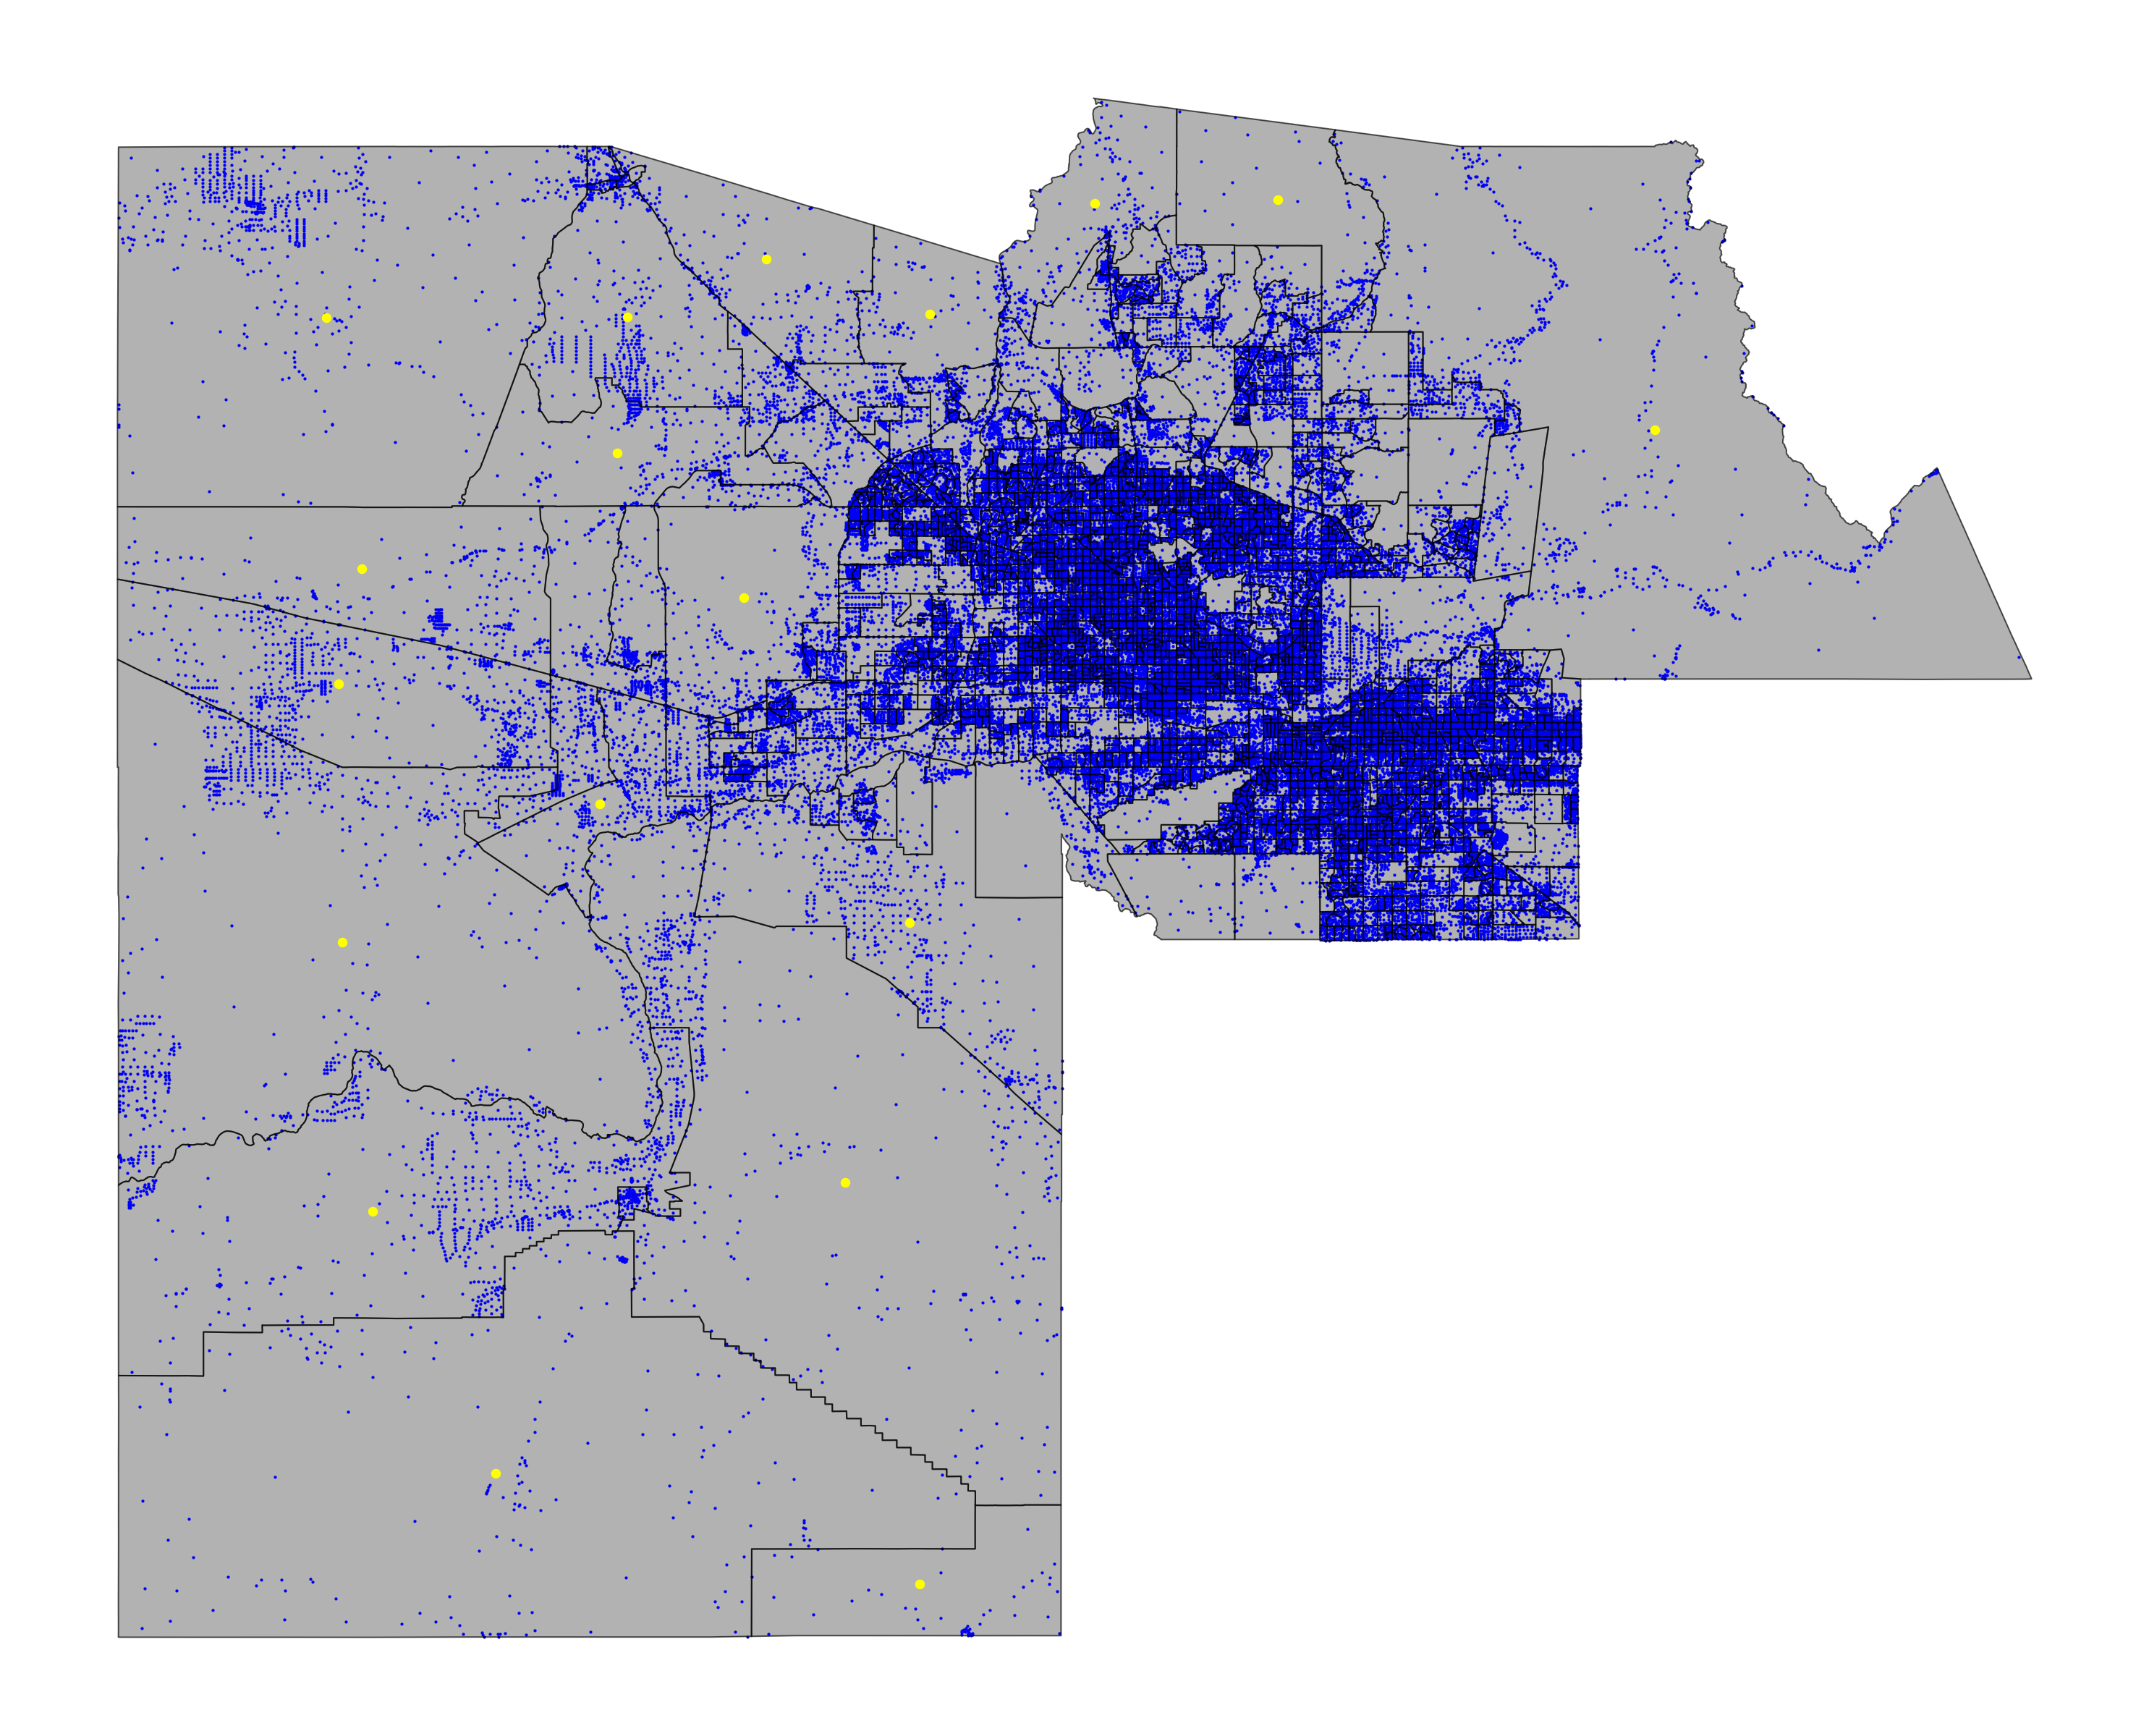

In [99]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(10, 15), dpi=300)

census_block_groups.plot(
    ax=ax, edgecolor="black", color="grey", linewidth=0.1, alpha=0.6
)

maricopa_county_gdf.plot(
    ax=ax, edgecolor="black", linewidth=0.01, marker="o", color="blue", markersize=1
)

census_block_groups.plot(
    ax=ax, edgecolor="black", color="none", linewidth=0.5, alpha=0.6
)

centroids_gdf.plot(ax=ax, color="yellow", marker="o", markersize=5)


ax.axis("off")
plt.tight_layout()
save_path = os.path.join(dir_path, "Unit Center Points Centroid.png")
plt.savefig(save_path)
plt.show()

In [97]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(10, 15), dpi=300)

census_block_groups.plot(
    ax=ax, edgecolor="black", color="grey", linewidth=0.1, alpha=0.6
)

maricopa_county_gdf.plot(
    ax=ax, edgecolor="black", linewidth=0.01, marker="o", color="blue", markersize=1
)

census_block_groups.plot(
    ax=ax, edgecolor="black", color="none", linewidth=0.5, alpha=0.6
)

centroids_gdf.plot(ax=ax, color="yellow", marker="o", markersize=5)
social_centroids_gdf.plot(ax=ax, marker="o", color="cyan", markersize=5)

ax.axis("off")
plt.tight_layout()
plt.show()


In [90]:
# Step 1: Filter census_block_groups where area > 0.02
filtered_df = census_block_groups[census_block_groups["area"] > 0.02]

# Step 2: Randomly select one row (polygon) from the filtered DataFrame
selected_row = filtered_df.sample(n=1)

In [ ]:
I want the 

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_26764/1245281907.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_gdf = gpd.GeoDataFrame(geometry=[selected_row.geometry.centroid.iloc[0]])


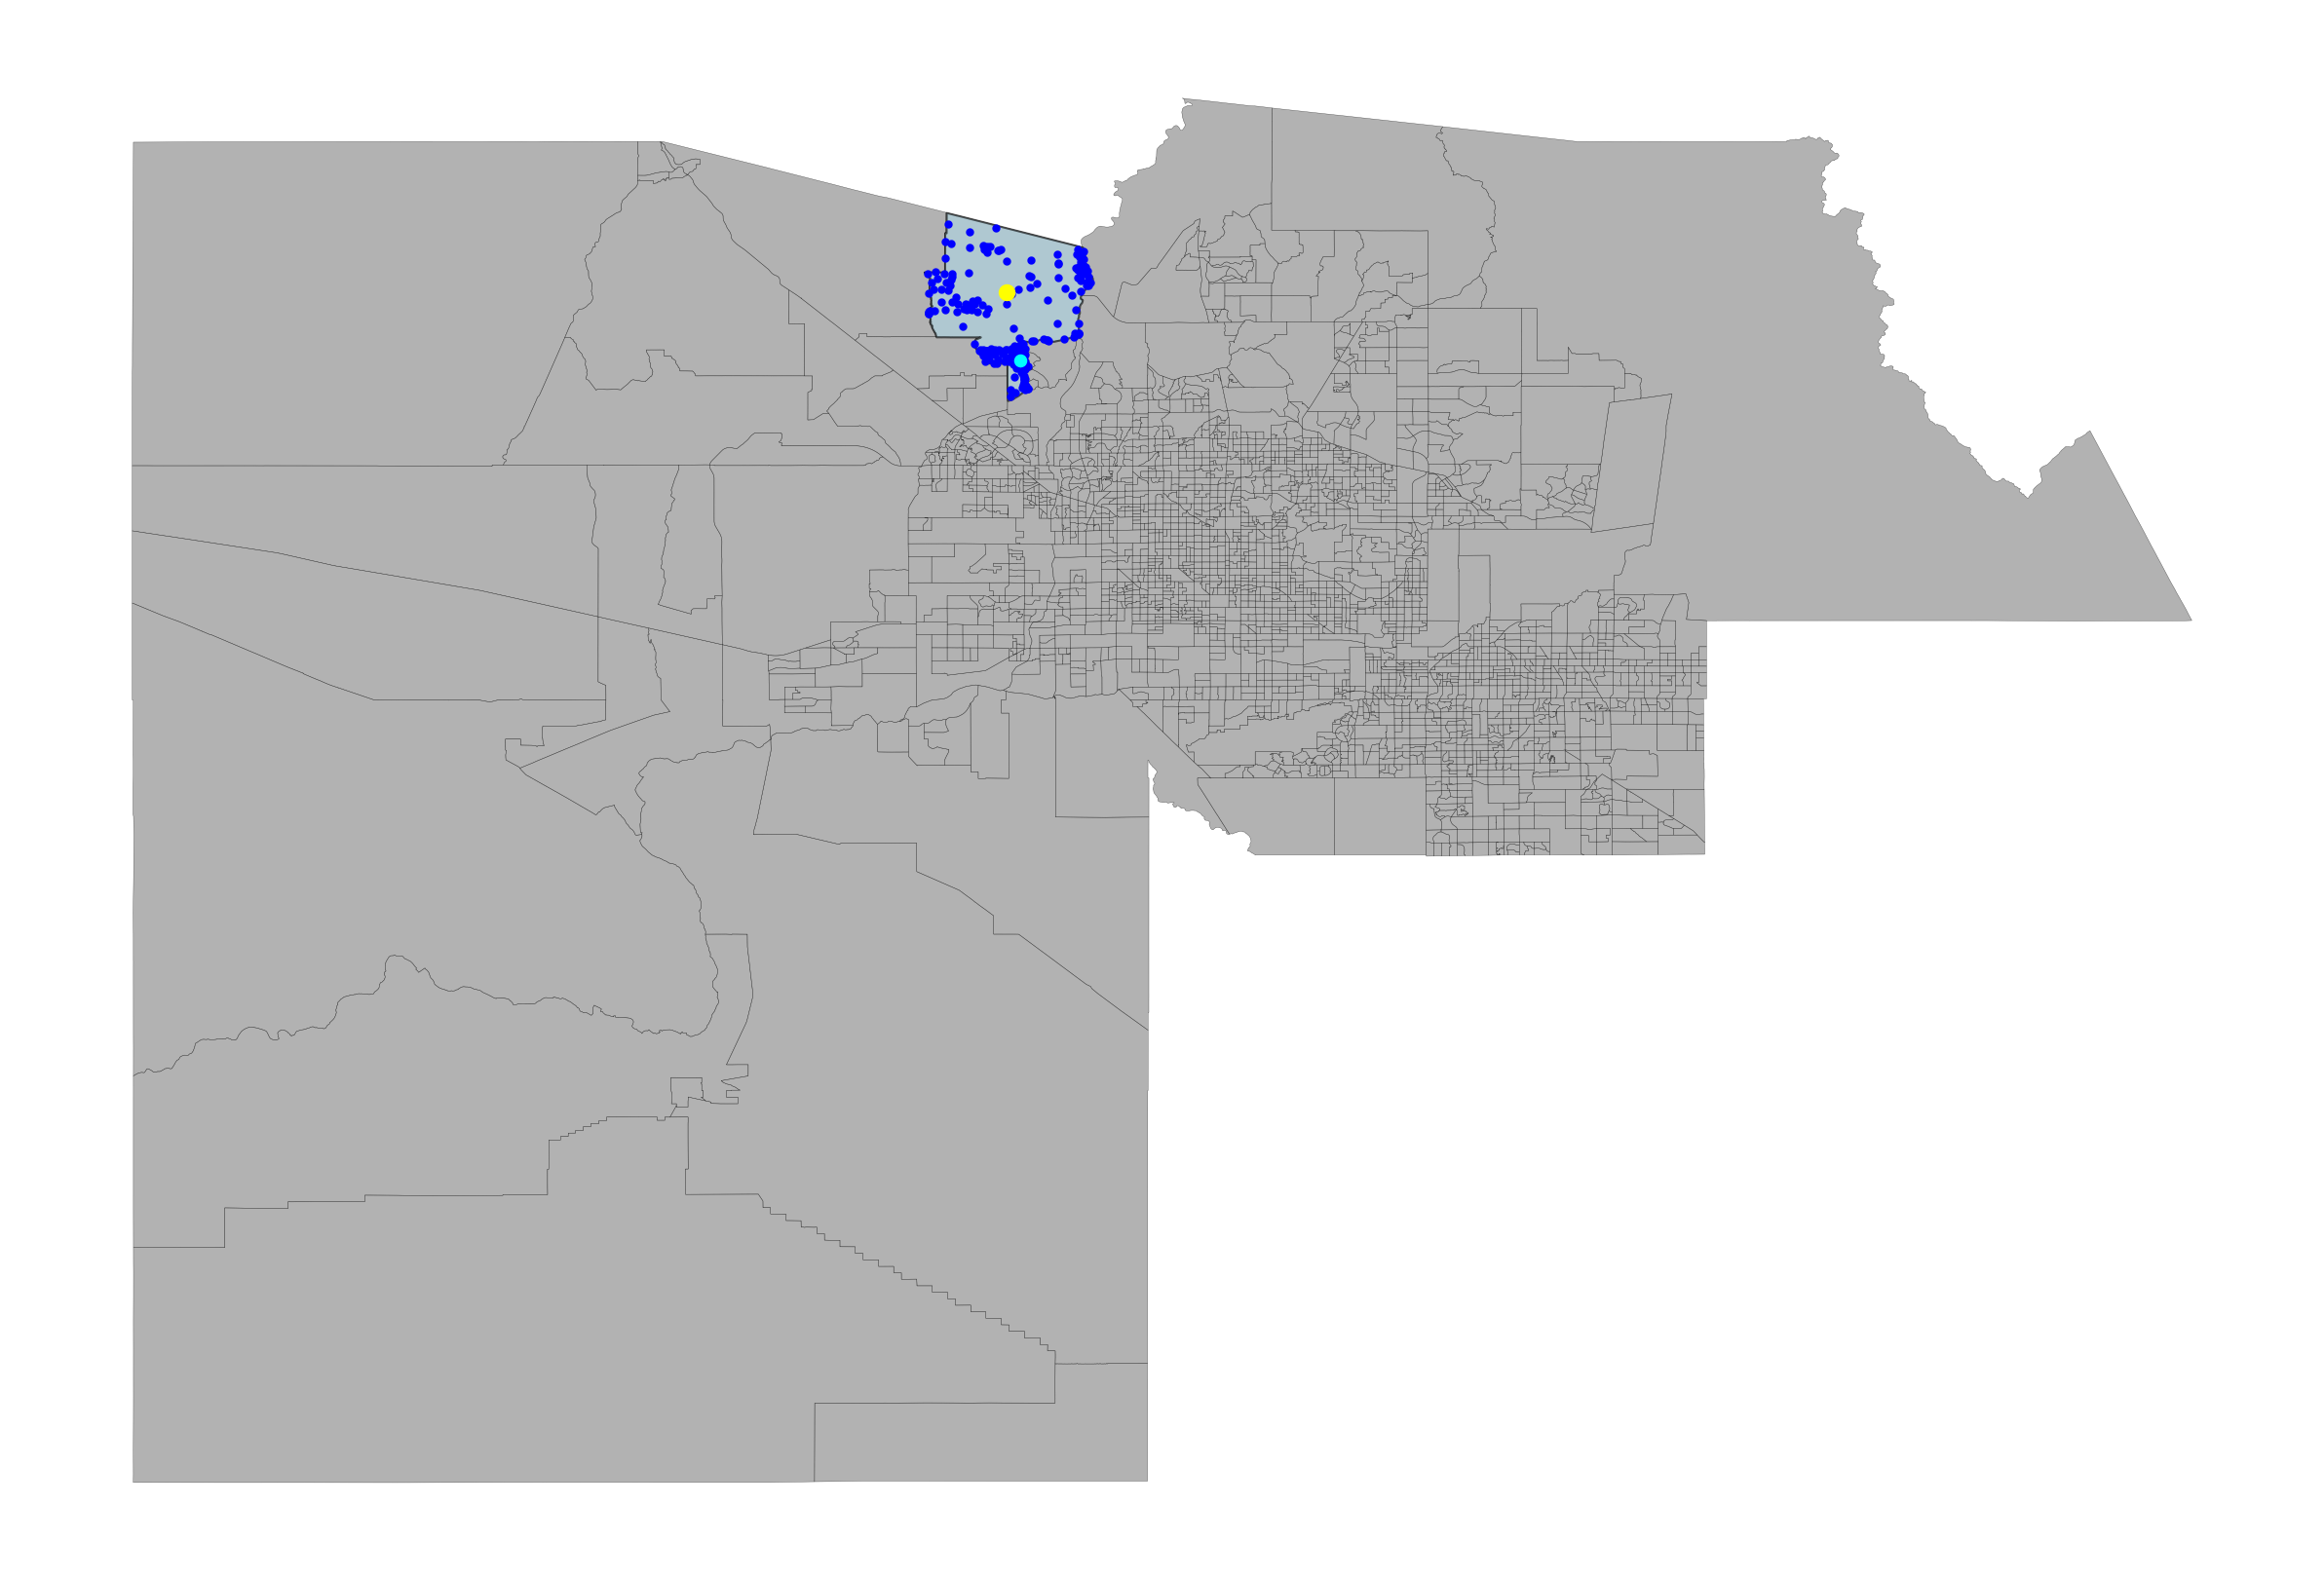

In [91]:
# Step 3: Filter maricopa_county_gdf for points within the selected polygon
selected_polygon = selected_row.iloc[0].geometry
points_within_polygon = maricopa_county_gdf[
    maricopa_county_gdf.within(selected_polygon)
]

# Step 4: Create centroids_gdf for the selected polygon's centroid
centroids_gdf = gpd.GeoDataFrame(geometry=[selected_row.geometry.centroid.iloc[0]])

social_centroids_within_polygon = valid_centroids[
    valid_centroids.within(selected_polygon)
]
social_centroids_gdf = gpd.GeoDataFrame(
    geometry=social_centroids_within_polygon["Social_centroid"]
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
census_block_groups.plot(
    ax=ax, edgecolor="black", color="grey", linewidth=0.1, alpha=0.6
)

# Highlight the selected polygon
selected_row.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.5, alpha=0.6)

# Plot points within the selected polygon
points_within_polygon.plot(ax=ax, marker="o", color="blue", markersize=1)

# Plot the centroid of the selected polygon
centroids_gdf.plot(ax=ax, color="yellow", marker="o", markersize=10)

# Plot social centroids (if any) within the selected polygon
social_centroids_gdf.plot(ax=ax, color="cyan", marker="o", markersize=5)

ax.axis("off")
plt.show()

In [ ]:
# Filter out points where 'Population 2015' equals 0
points_within_polygon_filtered = points_within_polygon[
    points_within_polygon["Population 2015"] != 0
]

# Determine the max value for 'Population 2015' for normalization, after filtering
vmax = points_within_polygon_filtered["Population 2015"].max()

# Continue with the plotting as before, using points_within_polygon_filtered


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm

# Assuming the existence of the necessary GeoDataFrames and the previous steps

# Determine the max value for 'Population 2015' for normalization
vmax = points_within_polygon["Population 2015"].max()

# Normalize 'Population 2015' values for coloring
norm = Normalize(vmin=0, vmax=50)
cmap = cm.viridis  # Choose a colormap

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Highlight the selected polygon
selected_row.plot(ax=ax, color="grey", edgecolor="black", linewidth=0.5, alpha=0.6)

# Plot points with 'Population 2015' coloring
points_within_polygon.plot(
    ax=ax,
    marker="o",
    color=[cmap(norm(value)) for value in points_within_polygon["Population 2015"]],
    markersize=5,
)

# Plot the centroid of the selected polygon
centroids_gdf.plot(ax=ax, color="yellow", marker="o", markersize=10)

# Plot social centroids (if any) within the selected polygon
social_centroids_gdf.plot(ax=ax, color="cyan", marker="o", markersize=5)

# Create a color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You need this line for the colorbar to know about the normalization
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Population 2015")

ax.axis("off")
plt.show()


In [ ]:
age_groups = ["school", "adults", "elder"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(maricopa_county_gdf[age_groups])

# Update the dataframe with the scaled values
maricopa_county_gdf = maricopa_county_gdf.copy()
maricopa_county_gdf[age_groups] = scaled_data

In [ ]:
maricopa_county_gdf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set up a 2x2 grid for the plots
fig = plt.figure(figsize=(20, 20), dpi=300)
gs = gridspec.GridSpec(2, 2, figure=fig)

# Original plot (1x1)
ax1 = fig.add_subplot(gs[0, 0])
census_block_groups.plot(
    ax=ax1,
    edgecolor='black',
    color='grey',
    linewidth=0.1, 
    alpha=0.6
)
maricopa_county_gdf.plot(
    ax=ax1,
    edgecolor='black',
    linewidth=0.01,
    marker='o', 
    color='green', 
    markersize=1
)
census_block_groups.plot(
    ax=ax1,
    edgecolor='black',
    color='none',
    linewidth=0.5,
    alpha=0.6
)
ax1.axis('off')

# Plot for 'school' age group (1x2)
ax2 = fig.add_subplot(gs[0, 1])
census_block_groups.plot(
    ax=ax2,
    edgecolor='black',
    color='grey',
    linewidth=0.1, 
    alpha=0.6
)
maricopa_county_gdf.plot(ax=ax2, markersize=1, column='school', legend=True)
census_block_groups.plot(
    ax=ax2
    edgecolor='black',
    color='none',
    linewidth=0.5,
    alpha=0.6
)
ax2.axis('off')

# Plot for 'adults' age group (2x1)
ax3 = fig.add_subplot(gs[1, 0])
census_block_groups.plot(
    ax=ax3,
    edgecolor='black',
    color='grey',
    linewidth=0.1, 
    alpha=0.6
)
maricopa_county_gdf.plot(ax=ax3, markersize=1, column='adults', legend=True)
census_block_groups.plot(
    ax=ax3,
    edgecolor='black',
    color='none',
    linewidth=0.5,
    alpha=0.6
)
ax3.axis('off')

# Plot for 'elder' age group (2x2)
ax4 = fig.add_subplot(gs[1, 1])
census_block_groups.plot(
    ax=ax4,
    edgecolor='black',
    color='grey',
    linewidth=0.1, 
    alpha=0.6
)

census_block_groups.plot(
    ax=ax4,
    edgecolor='black',
    color='none',
    linewidth=0.5,
    alpha=0.6
)
ax4.axis('off')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Step 1: Calculate percentiles for the 'school' column
p25 = np.percentile(maricopa_county_gdf_scaled["school"], 25)
p50 = np.percentile(maricopa_county_gdf_scaled["school"], 50)
p75 = np.percentile(maricopa_county_gdf_scaled["school"], 75)


# Step 2: Categorize each record
def categorize_school(row):
    if row["school"] <= p25:
        return "0-25%"
    elif row["school"] <= p50:
        return "25-50%"
    elif row["school"] <= p75:
        return "50-75%"
    else:
        return "75-100%"


maricopa_county_gdf_scaled["school_category"] = maricopa_county_gdf_scaled.apply(
    categorize_school, axis=1
)

# Step 3: Plot each category in its respective subplot

# Set up a 2x2 grid for the plots
fig = plt.figure(figsize=(20, 20), dpi=300)
gs = gridspec.GridSpec(2, 2, figure=fig)

categories = ["0-25%", "25-50%", "50-75%", "75-100%"]
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
]

for category, ax in zip(categories, axes):
    subset = maricopa_county_gdf_scaled[
        maricopa_county_gdf_scaled["school_category"] == category
    ]
    subset.plot(ax=ax, column="school", legend=True, cmap="viridis")
    ax.set_title(f"School Age Group: {category}")
    ax.axis("off")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define percentile ranges based on the scaled 'school' values
ranges = [0, 0.25, 0.50, 0.75, 1]

# Set up a 2x2 grid for the plots
fig = plt.figure(figsize=(20, 20), dpi=300)
gs = gridspec.GridSpec(2, 2, figure=fig)

# Plot each percentile range in its respective subplot
for i, (low, high) in enumerate(zip(ranges[:-1], ranges[1:])):
    ax = fig.add_subplot(gs[i // 2, i % 2])

    # Include the census_block_groups as the base layer
    census_block_groups.plot(
        ax=ax, edgecolor="black", color="grey", linewidth=0.1, alpha=0.6
    )

    # Plot the 'school' data within the current percentile range
    subset = maricopa_county_gdf_scaled[
        (maricopa_county_gdf_scaled["elder"] > low)
        & (maricopa_county_gdf_scaled["elder"] <= high)
    ]
    subset.plot(ax=ax, column="school", legend=True, cmap="viridis", markersize=5)
    # Highlight the borders of census_block_groups
    census_block_groups.plot(
        ax=ax, edgecolor="black", color="none", linewidth=0.3, alpha=0.6
    )
    ax.set_title(f"School Age Group: {int(low * 100)}%-{int(high * 100)}%")
    ax.axis("off")

plt.tight_layout()
plt.show()
